In [177]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## may not do pipeline, since we do not do encoding and imputation;
## only transfor and fit

# load and explore dataset

In [178]:
##import training data and test data (to be predicted)
train = pd.read_csv('training_data.csv')
test = pd.read_csv('validation_data.csv')

In [179]:
##data dimensions and summary statistics
print(train.shape)
print(test.shape)
print(train.columns)
train.describe()

(7374, 13)
(1690, 11)
Index(['z [m]', 'qc [MPa]', 'fs [MPa]', 'u2 [MPa]', 'ID', 'Location ID',
       'Blowcount [Blows/m]', 'Normalised ENTRHU [-]',
       'Normalised hammer energy [-]', 'Number of blows', 'Diameter [m]',
       'Bottom wall thickness [mm]', 'Pile penetration [m]'],
      dtype='object')


z [m]     qc [MPa]     fs [MPa]     u2 [MPa]  \
count  7374.000000  7374.000000  7374.000000  7374.000000   
mean     20.004475    42.151491     0.512513     0.174952   
std      11.455214    24.486027     0.439347     0.162194   
min       0.500000     0.286700    -0.003936    -0.509725   
25%      10.000000    23.692669     0.185170     0.071147   
50%      20.000000    39.541200     0.370535     0.173601   
75%      29.500000    60.074400     0.725500     0.297250   
max      50.000000   110.043927     2.392300     1.911925   

       Blowcount [Blows/m]  Normalised ENTRHU [-]  \
count          4610.000000            4610.000000   
mean             65.207047               0.372894   
std              29.828039               0.167413   
min               4.000000               0.078542   
25%              44.000000               0.207796   
50%              72.000000               0.400283   
75%              86.000000               0.523750   
max             176.000000               0.739583   

       Normalised hammer energy [-]  Number of blows  Diameter [m]  \
count                   4610.000000      4610.000000  5.322000e+03   
mean                       0.496754       670.706765  2.480000e+00   
std                        0.223039       540.760135  2.957912e-13   
min                        0.120833         1.500000  2.480000e+00   
25%                        0.274354       167.625000  2.480000e+00   
50%                        0.536625       581.000000  2.480000e+00   
75%                        0.698333      1086.000000  2.480000e+00   
max                        0.893583      2332.000000  2.480000e+00   

       Bottom wall thickness [mm]  Pile penetration [m]  
count                 5322.000000           5322.000000  
mean                    55.101466             28.596017  
std                      7.719052              2.493044  
min                     50.000000             25.000000  
25%                     50.000000             27.000000  
50%                     50.000000             28.000000  
75%                     55.000000             31.000000  
max                     70.000000             34.000000

In [180]:
##show first five rows of data
train.head()

z [m]   qc [MPa]  fs [MPa]  u2 [MPa]       ID Location ID  \
0    0.5   5.150400  0.031200  0.006400  EK__0_5          EK   
1    1.0  11.681000  0.082700  0.015400  EK__1_0          EK   
2    1.5  11.107600  0.101300  0.019100  EK__1_5          EK   
3    2.0  10.449700  0.127000  0.030200  EK__2_0          EK   
4    2.5  10.585762  0.113588 -0.116242  EK__2_5          EK   

   Blowcount [Blows/m]  Normalised ENTRHU [-]  Normalised hammer energy [-]  \
0                  NaN                    NaN                           NaN   
1                  NaN                    NaN                           NaN   
2                  NaN                    NaN                           NaN   
3                  NaN                    NaN                           NaN   
4                  NaN                    NaN                           NaN   

   Number of blows  Diameter [m]  Bottom wall thickness [mm]  \
0              NaN          2.48                        50.0   
1              NaN          2.48                        50.0   
2              NaN          2.48                        50.0   
3              NaN          2.48                        50.0   
4              NaN          2.48                        50.0   

   Pile penetration [m]  
0                  31.0  
1                  31.0  
2                  31.0  
3                  31.0  
4                  31.0

In [181]:
##check how many unique sites
print("unique sites of training set: ",train['Location ID'].unique())
print(len(train['Location ID'].unique()))

print('unique sites of test set: ',test['Location ID'].unique())
len(test['Location ID'].unique())

unique sites of training set:  ['EK' 'DE' 'CS' 'DH' 'BG' 'AA' 'CD' 'CA' 'DW' 'CJ' 'AU' 'DQ' 'AX' 'DZ'
 'BU' 'BR' 'EC' 'AD' 'AR' 'CM' 'CY' 'EE' 'BO' 'CP' 'DK' 'DN' 'AI' 'AL'
 'BL' 'EH' 'BA' 'DB' 'EL' 'DF' 'CT' 'DI' 'BH' 'AB' 'CE' 'CB' 'DX' 'CK'
 'AV' 'DR' 'AY' 'EA' 'BV' 'BS' 'AS' 'CN' 'CZ' 'EF' 'BP' 'CQ' 'DL' 'DO'
 'AJ' 'AM' 'BM' 'EI' 'BB' 'DC' 'EM' 'DG' 'CU' 'DJ' 'BI' 'AC' 'CF' 'CC'
 'DY' 'CL' 'AW' 'DS' 'AZ' 'EB' 'BW' 'BT' 'ED' 'AE' 'AT' 'CO' 'DA' 'EG'
 'BQ' 'CR' 'DM' 'DP' 'AK' 'AN' 'BN' 'EJ' 'BC' 'DD']
94
unique sites of test set:  ['BJ' 'CV' 'BX' 'CG' 'DT' 'BD' 'AO' 'BK' 'CW' 'BY' 'CH' 'DU' 'BE' 'AP'
 'CX' 'BZ' 'CI' 'DV' 'BF' 'AQ']


20

In [12]:
# ##cannot do train-test-split, regression along depth for each site
# print("number of training set that goes for validation: ",len(train_full['Location ID'].unique())*0.3)

# ##so randomly choose three sites as candidates for validation set
# valid_id = ['EL','CB','AV']
# train = train_full[~train_full['Location ID'].isin(valid_id)]
# valid = train_full[train_full['Location ID'].isin(valid_id)]
# print("shape of train: ",train.shape)
# print('shape of valid: ',valid.shape)

number of training set that goes for validation:  28.2
shape of train:  (7134, 13)
shape of valid:  (240, 13)


## no need to set three additional sites for validation since we will use cross validation to test model performance 

# EDA

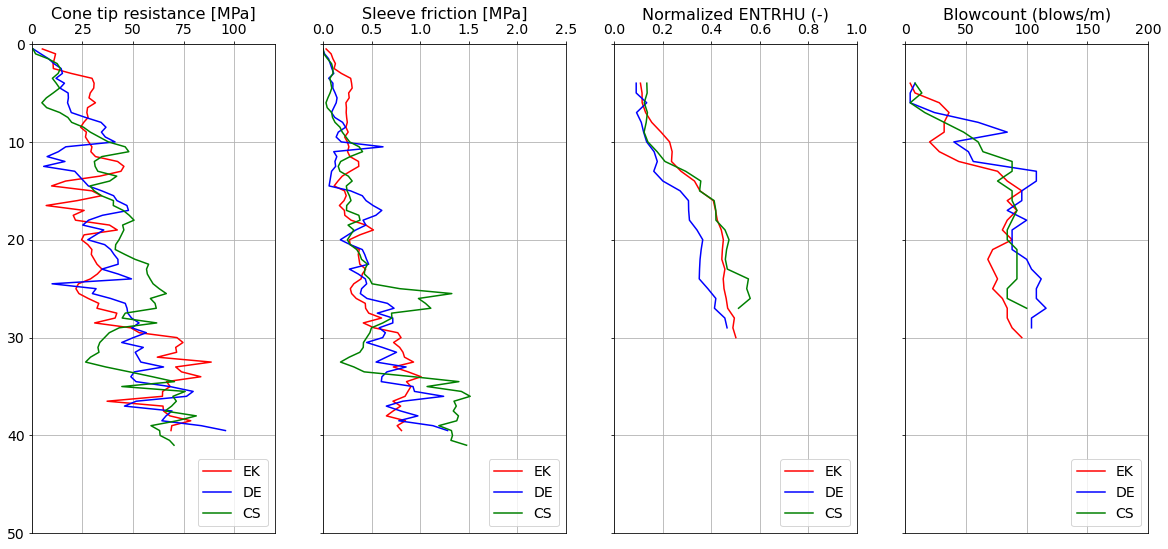

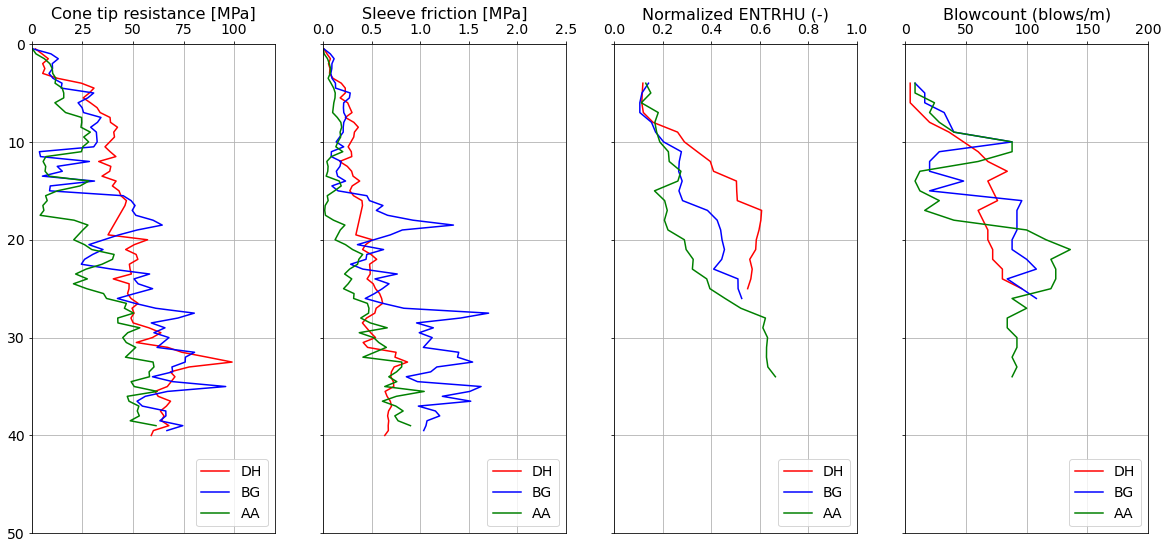

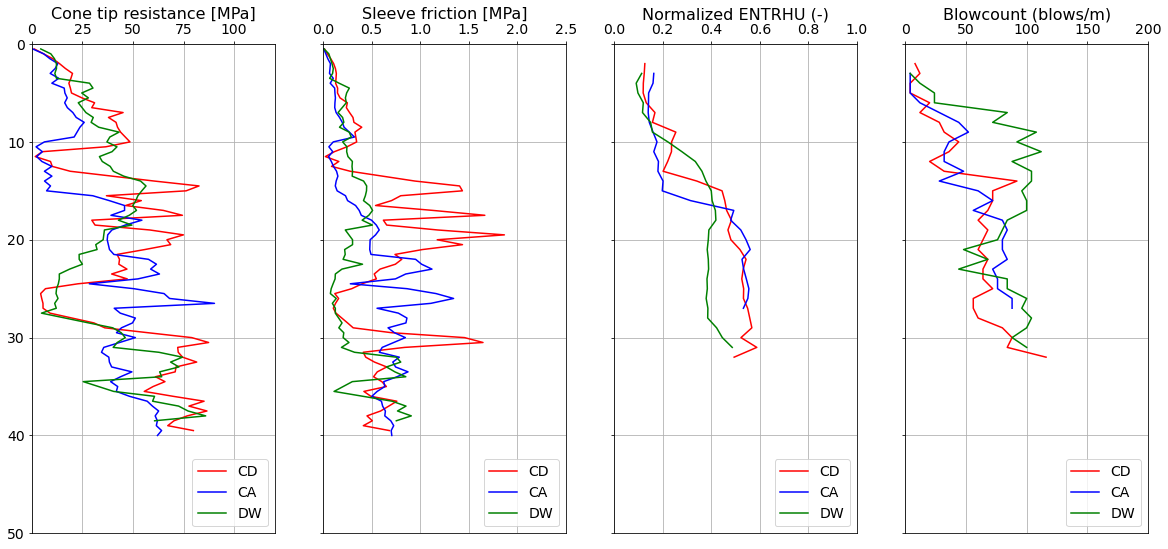

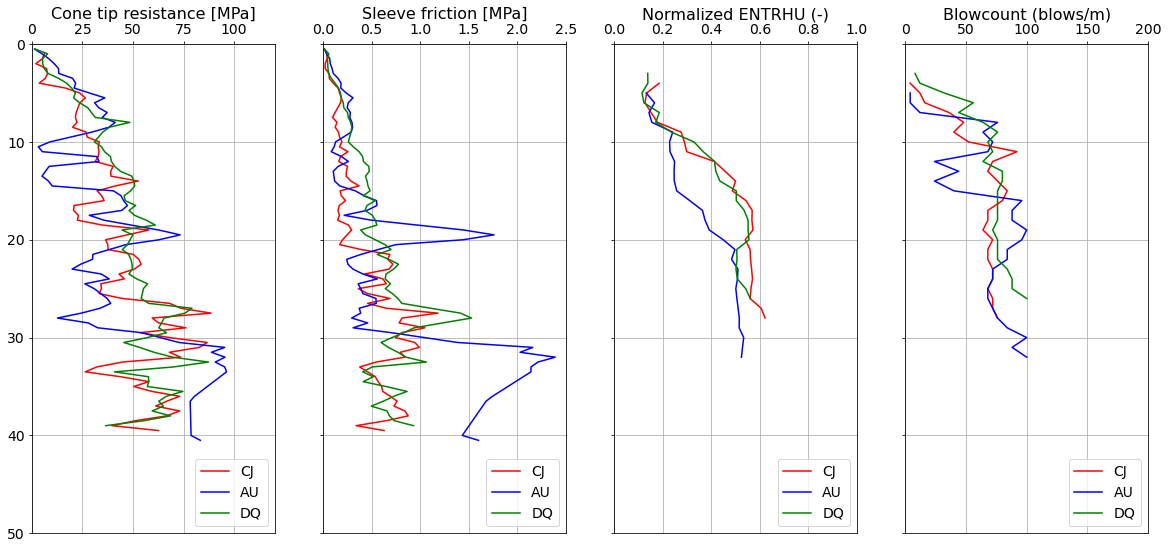

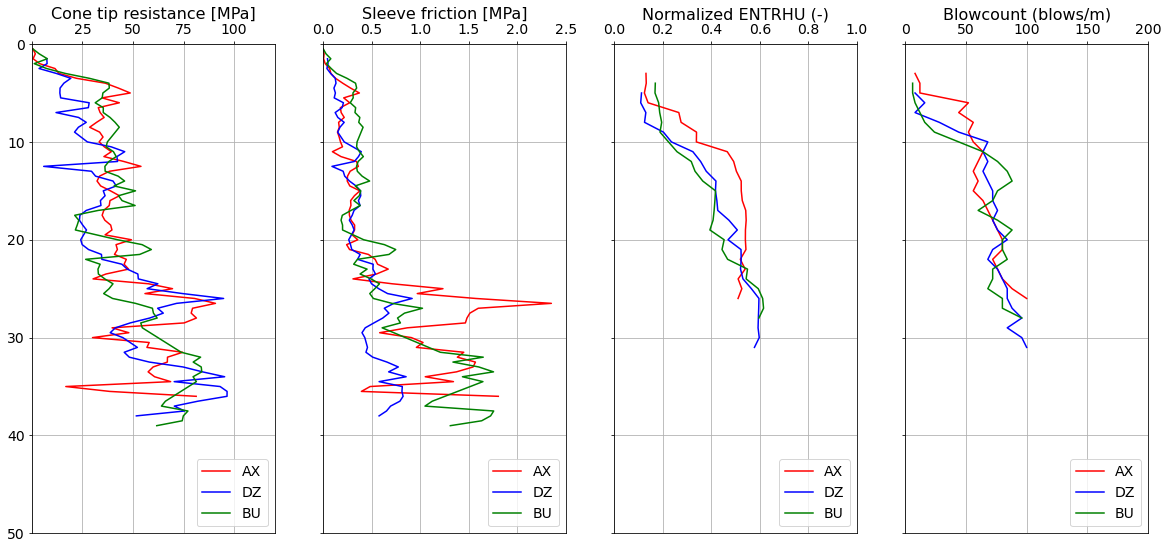

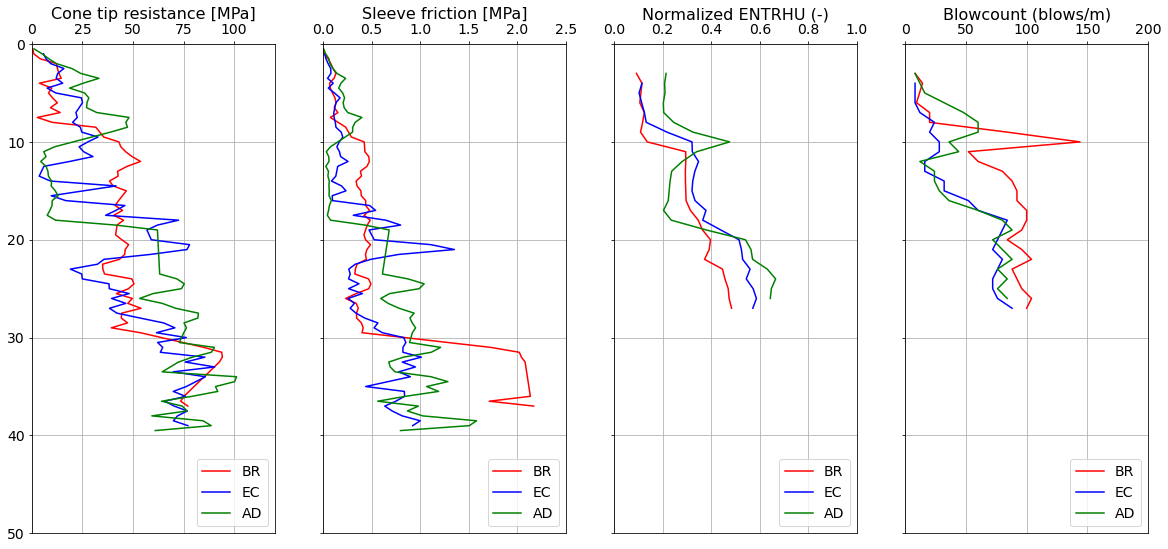

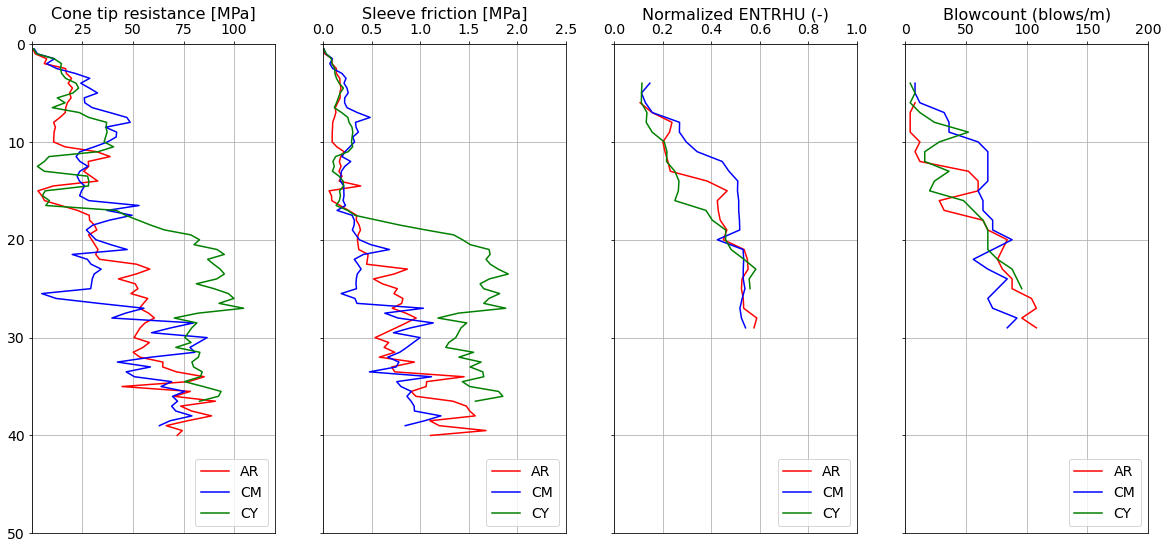

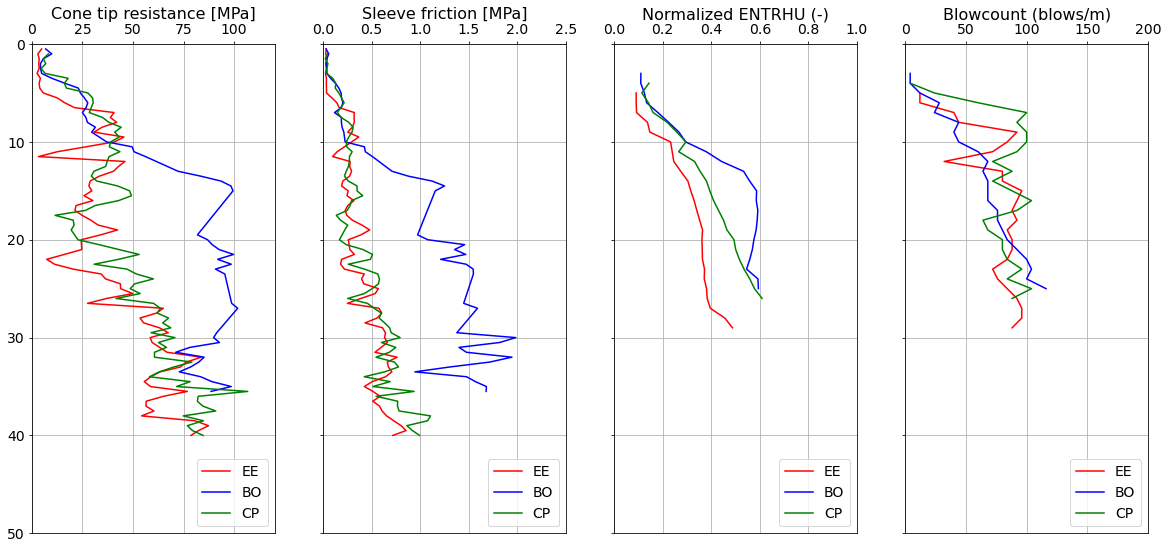

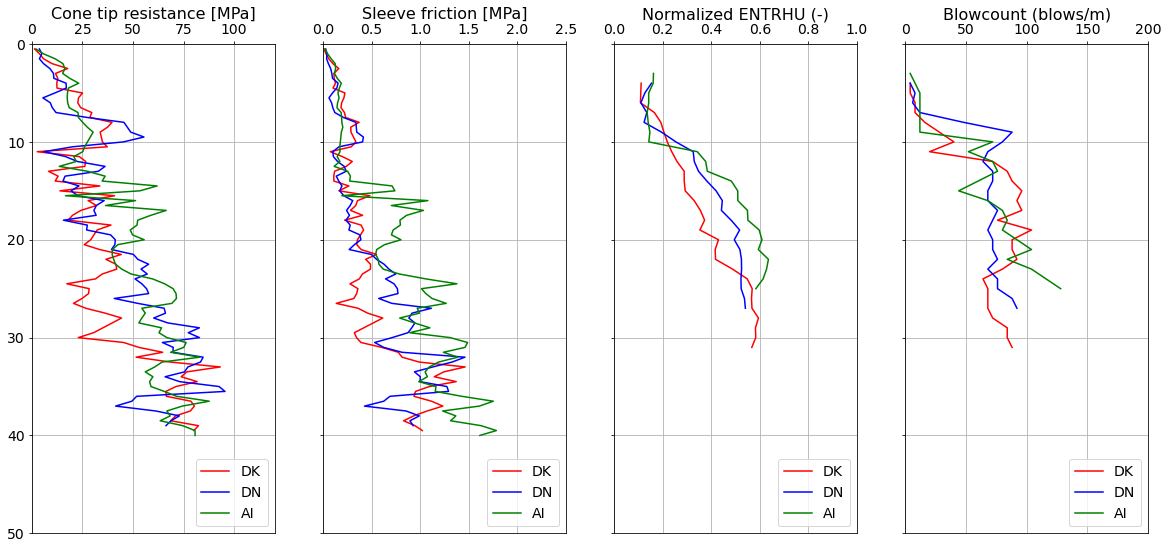

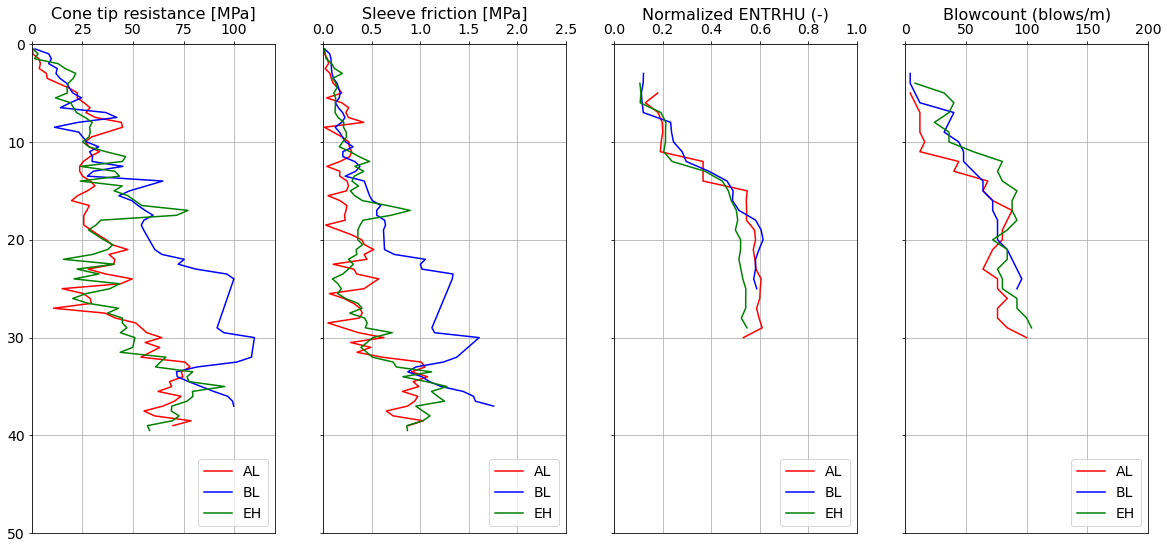

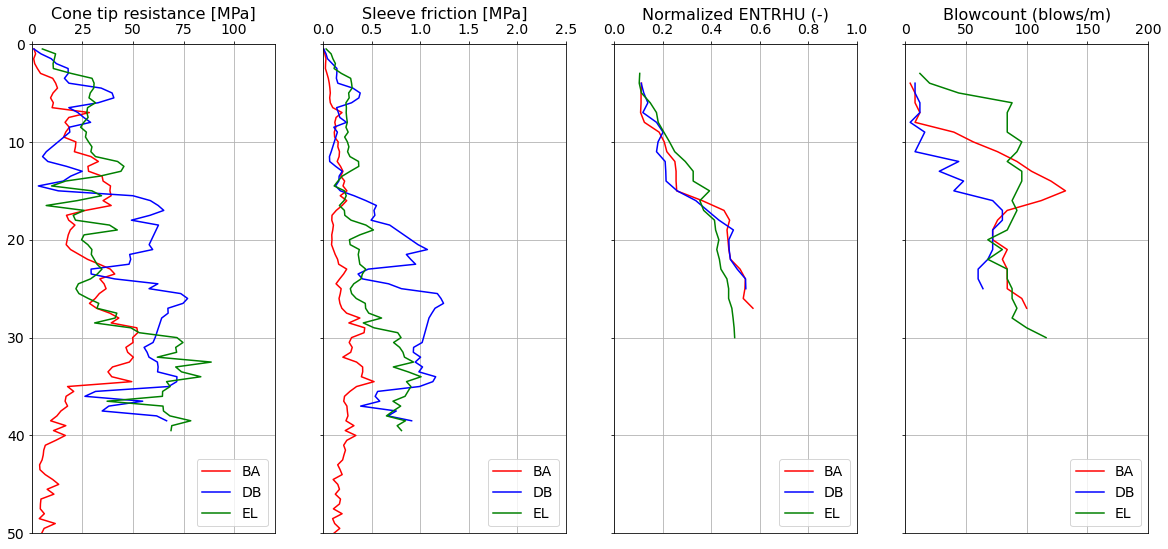

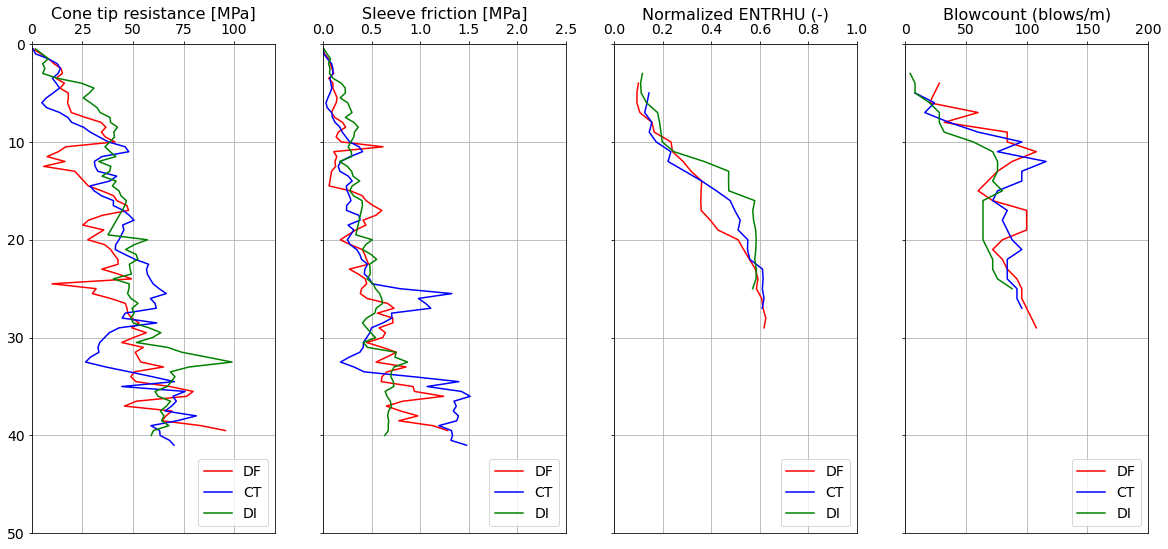

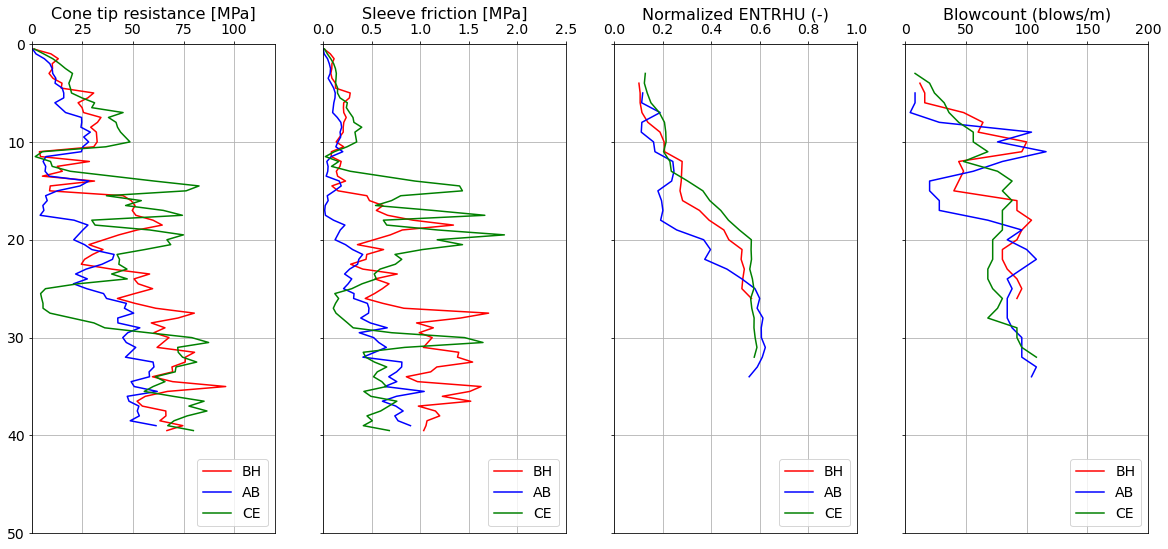

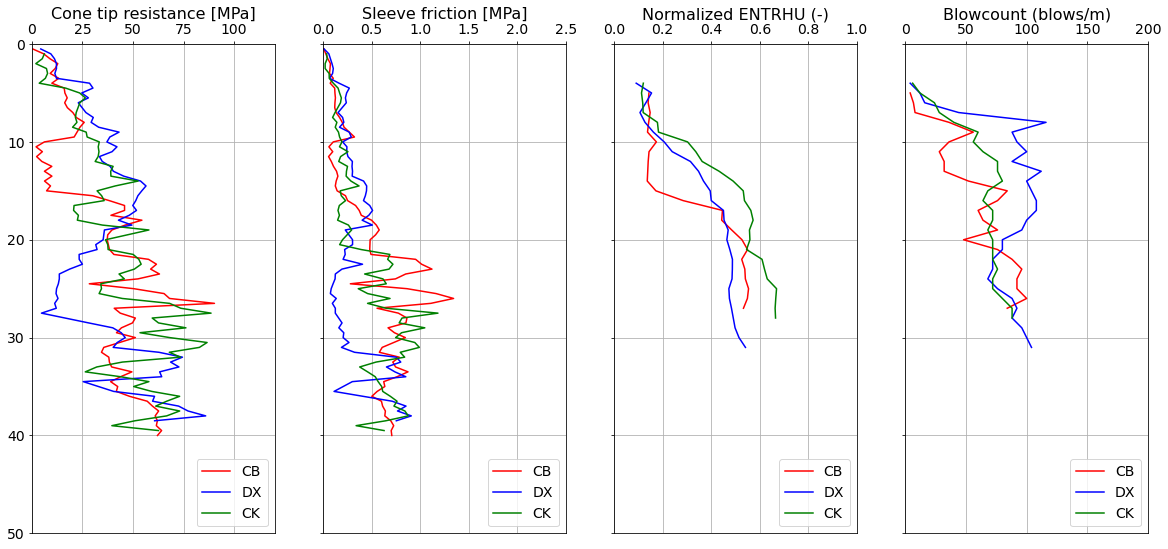

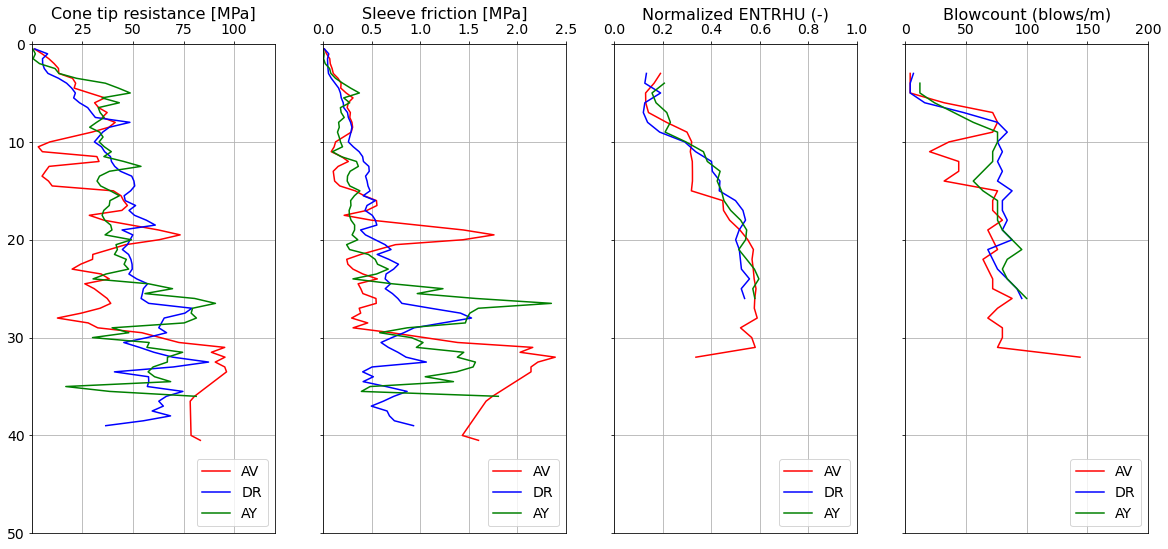

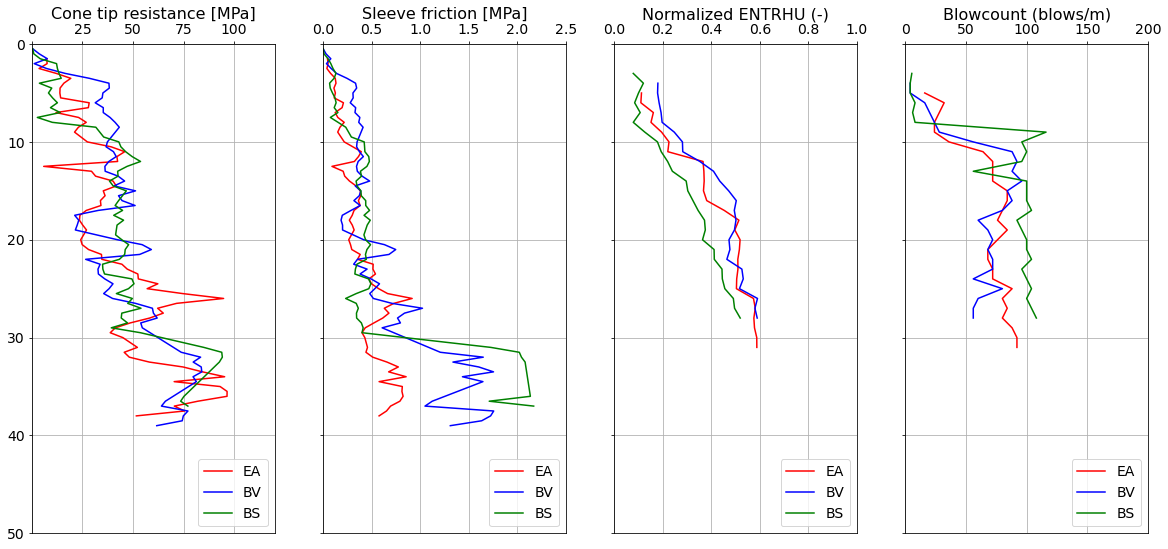

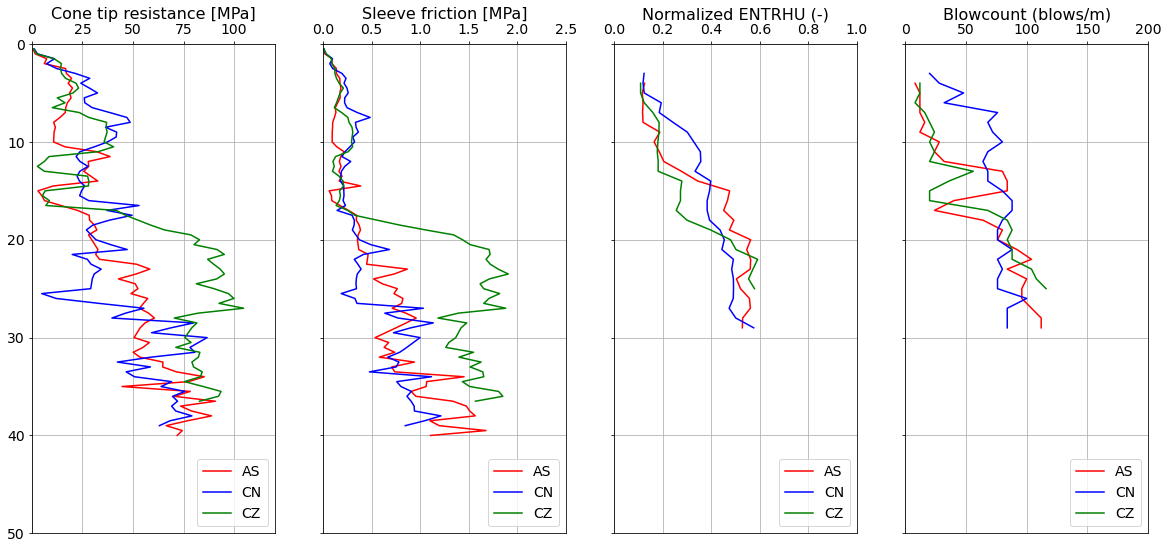

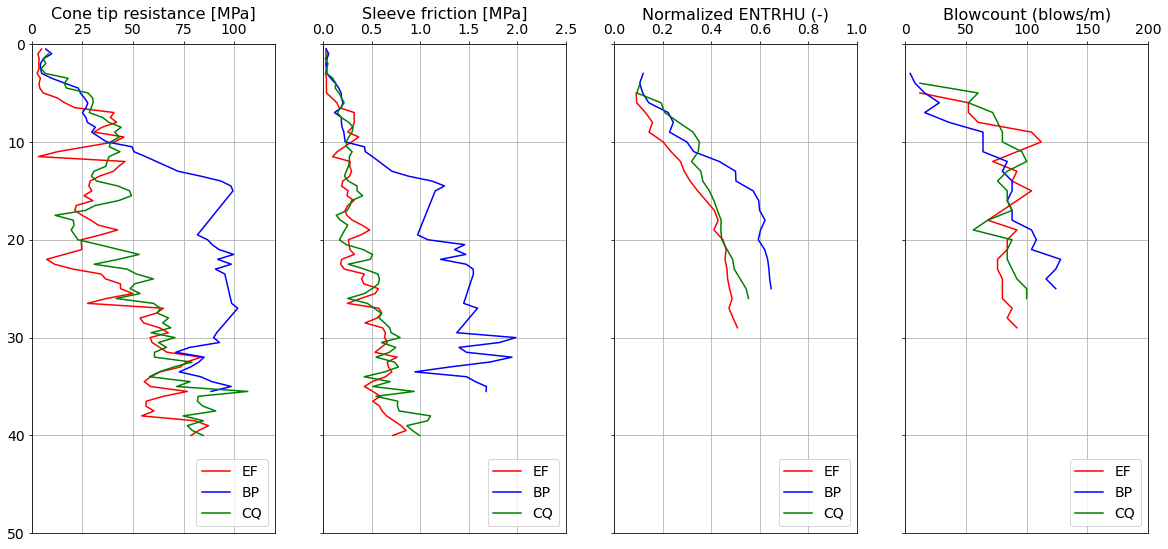

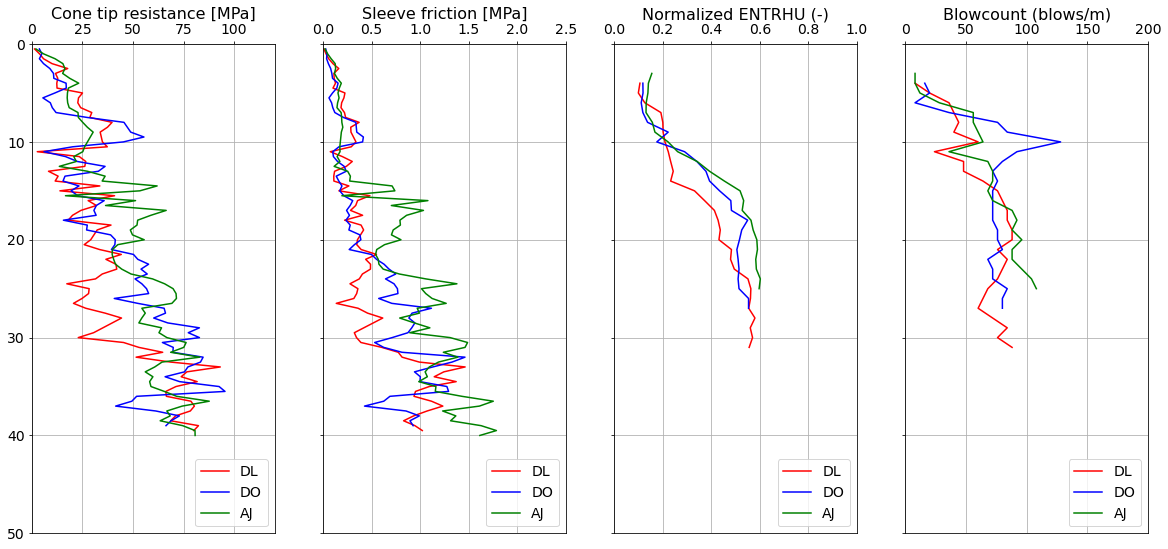

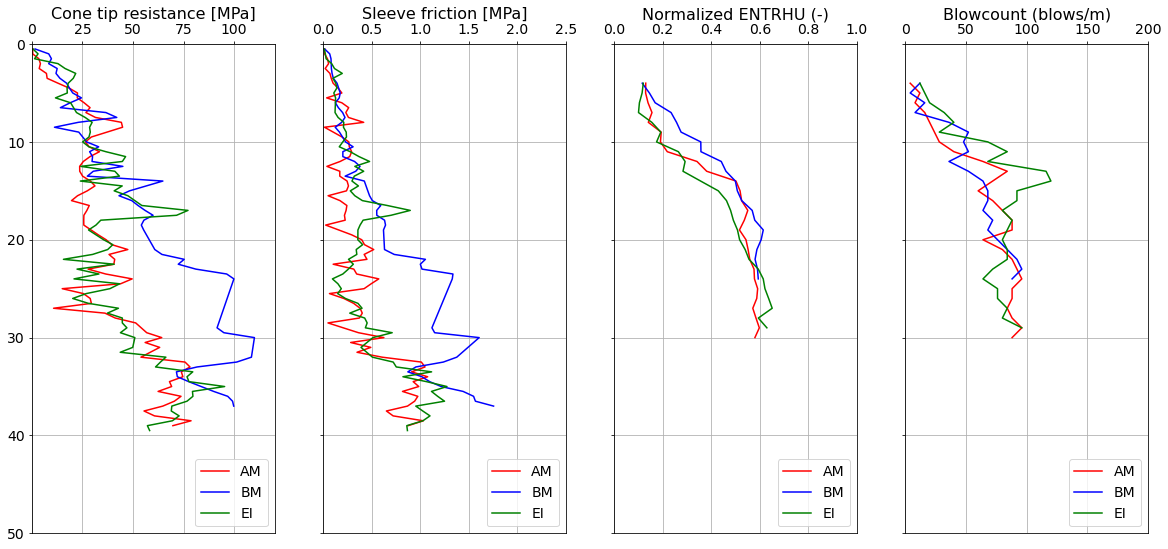

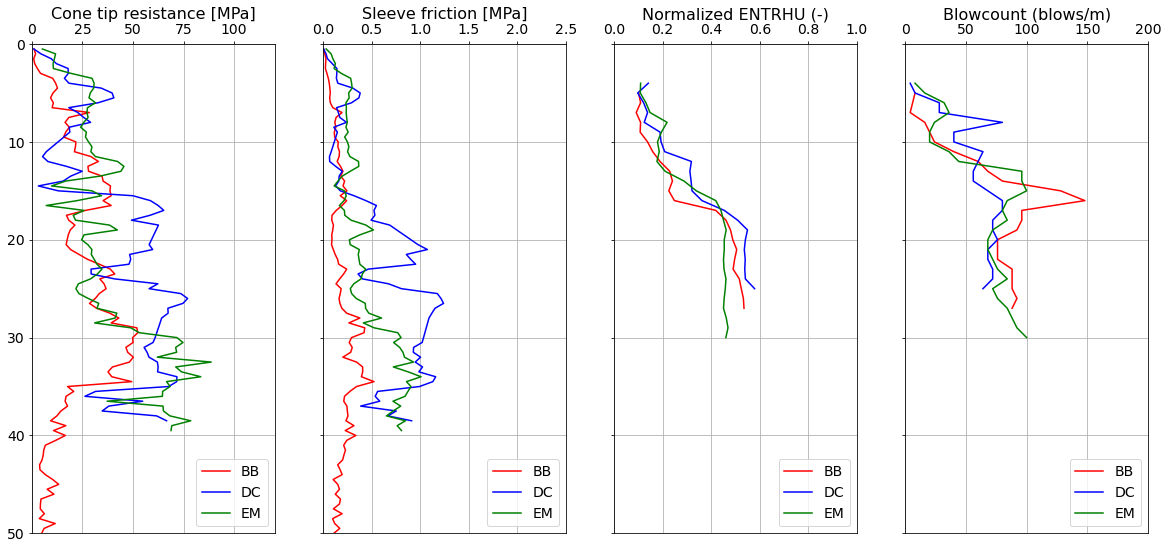

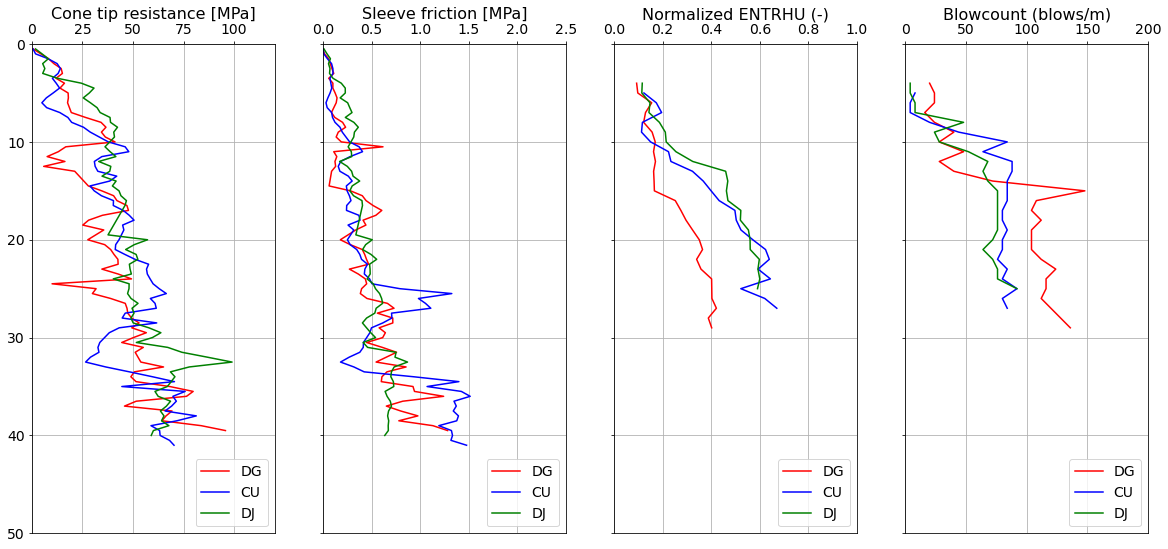

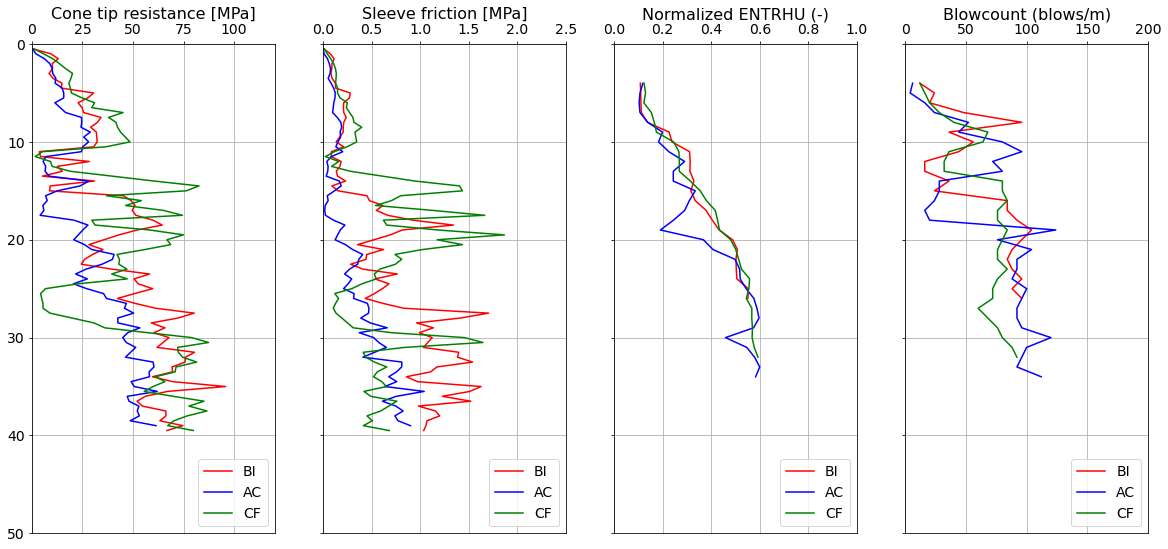

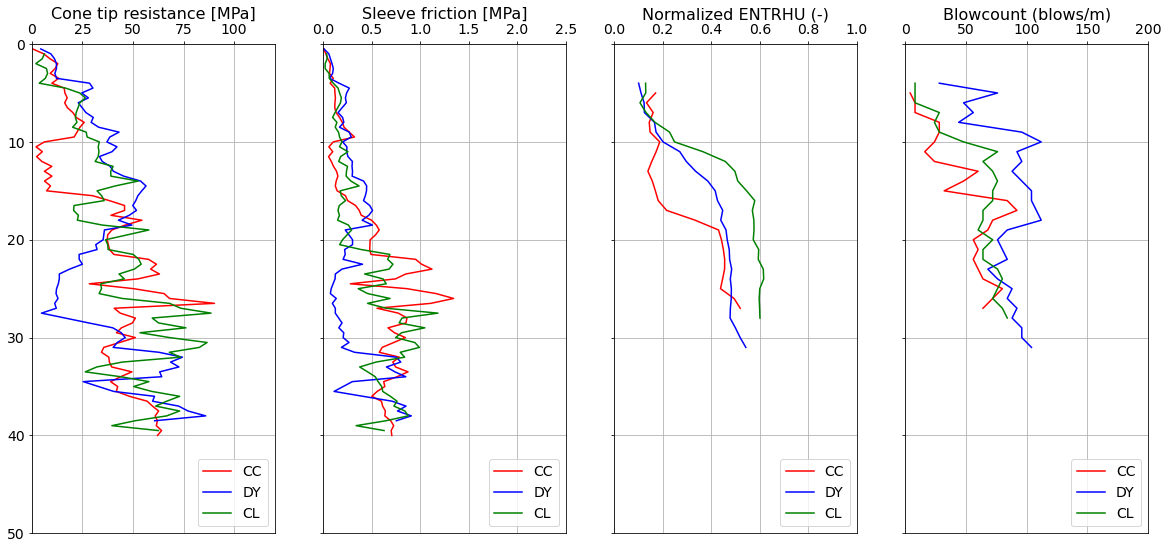

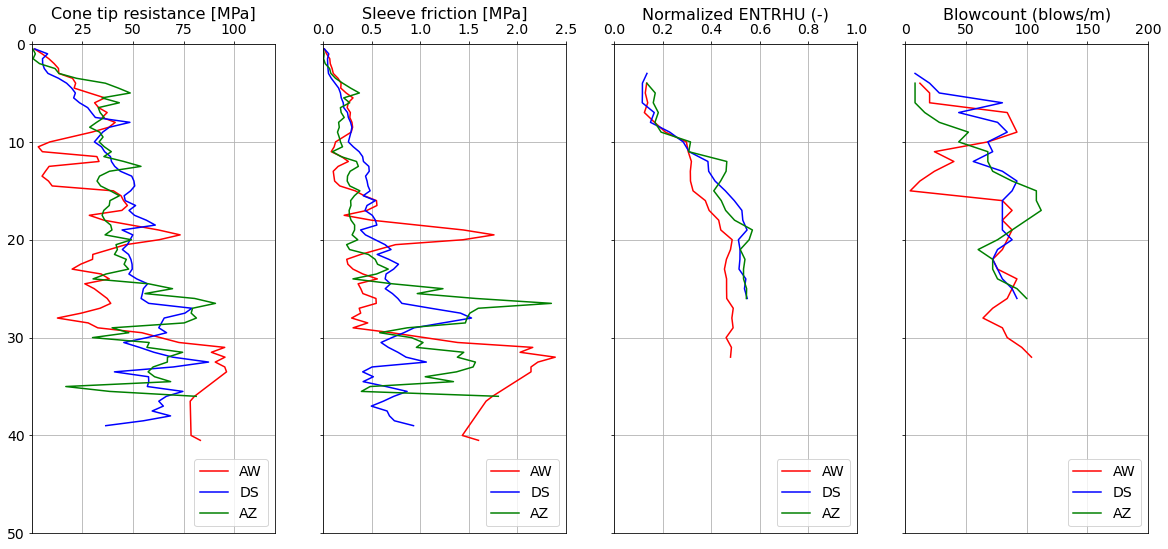

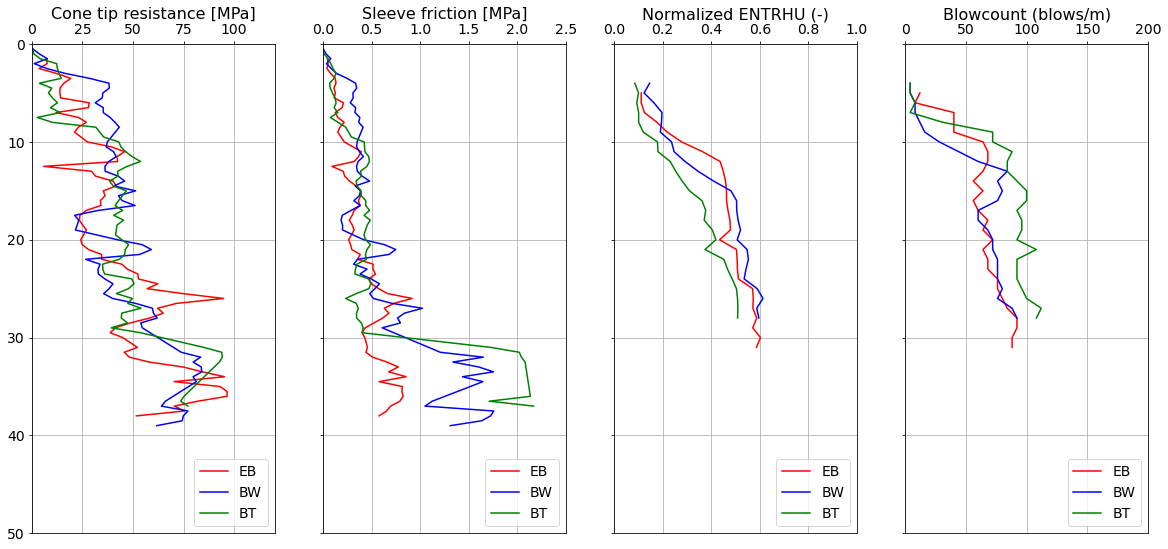

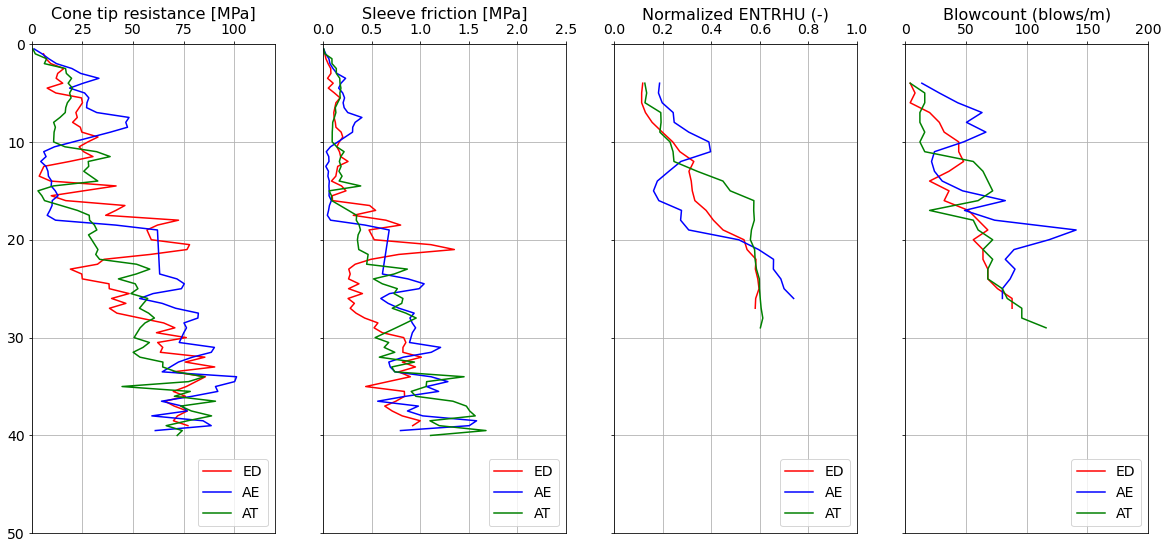

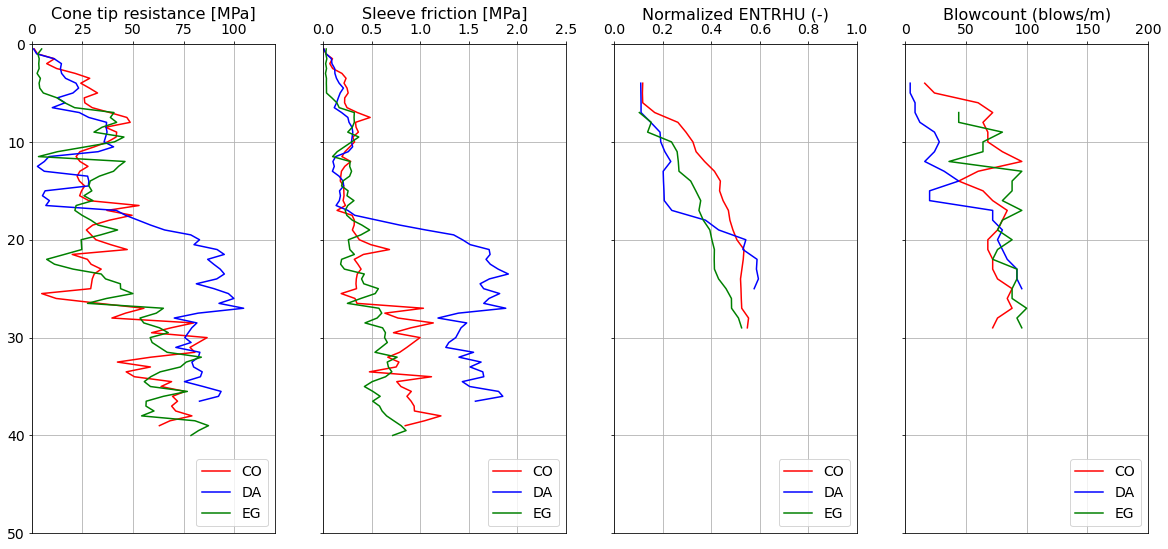

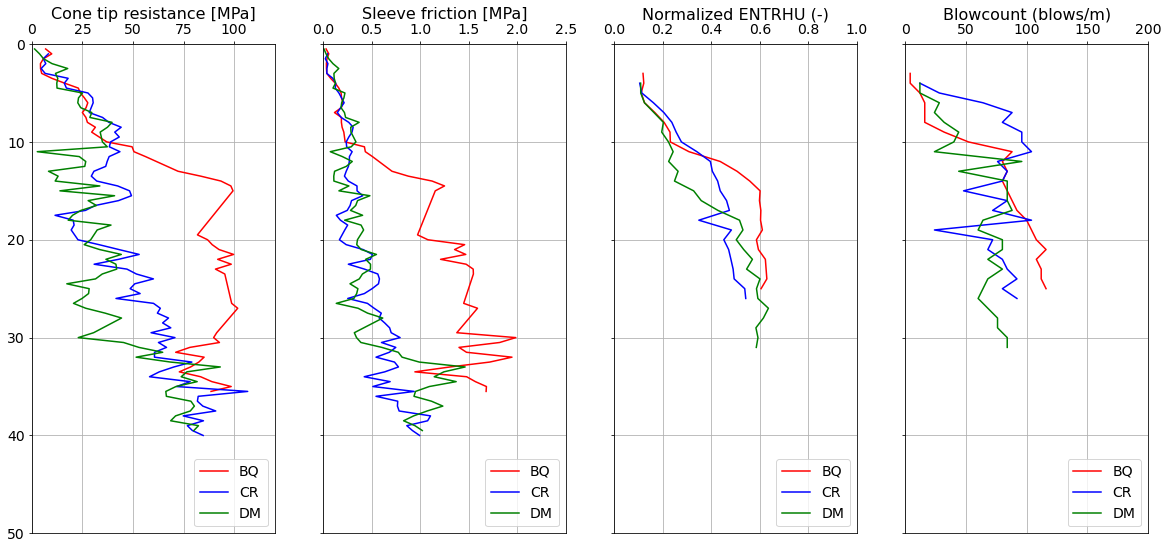

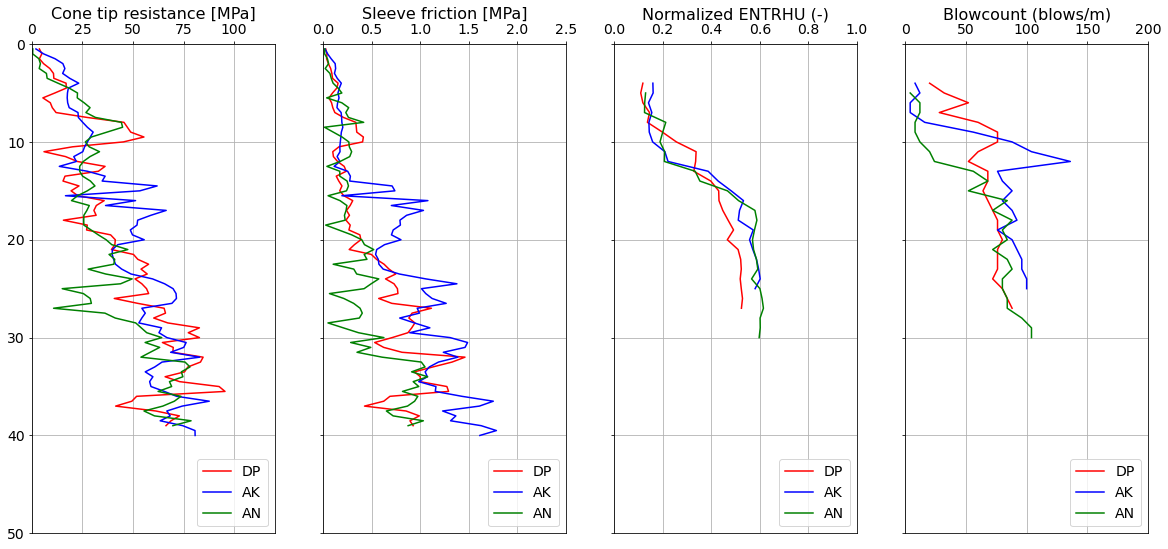

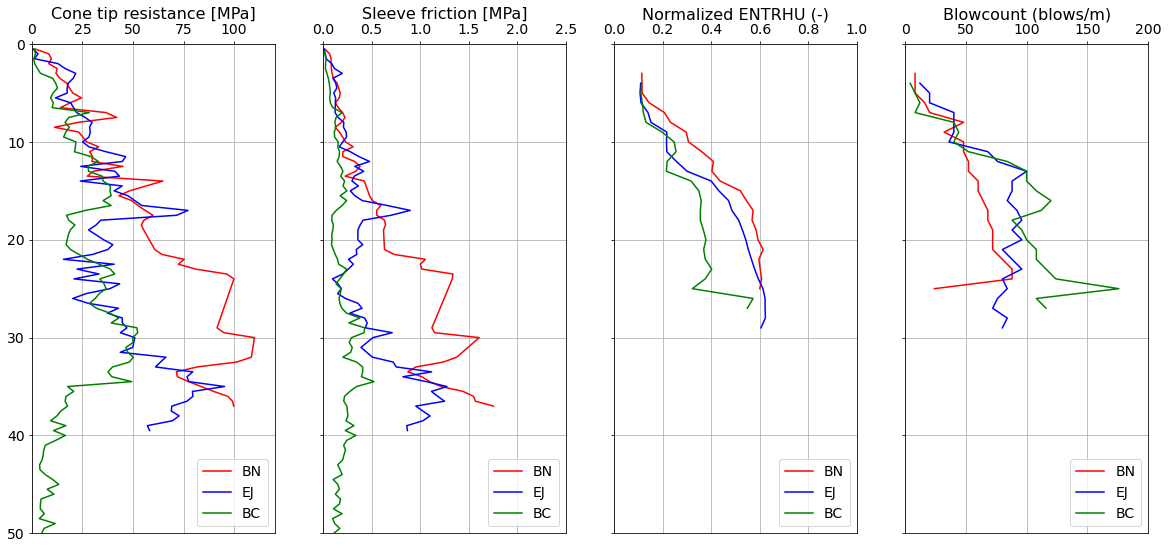

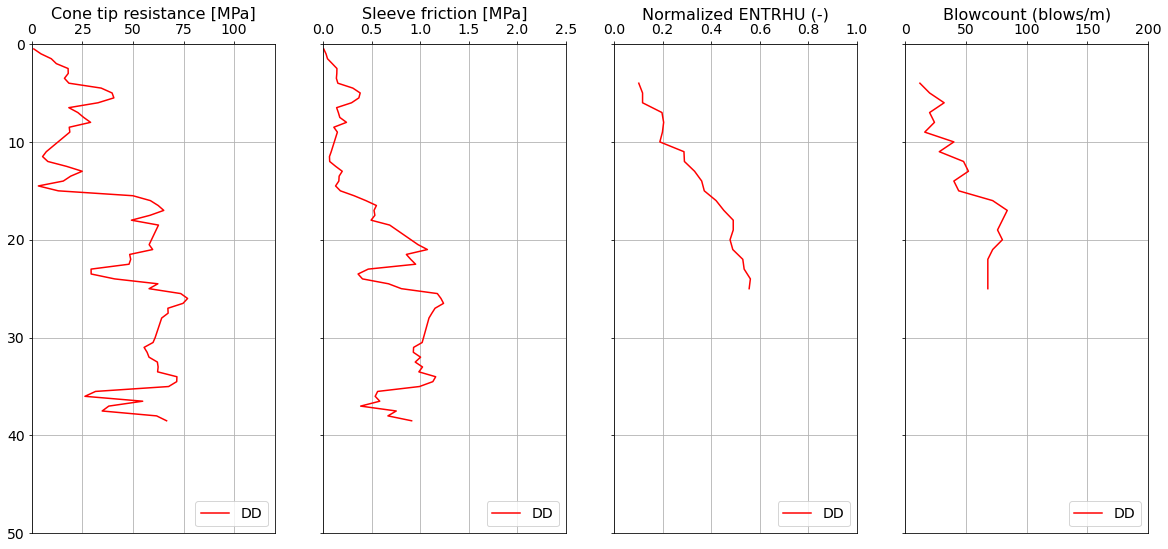

In [24]:
##plot cone tip resistance,normalized ENTRHU, and blowcount for each site
##every three sites on the same graph
color_list = ['r','b','g','c','m','y','k']

k = 0
while k < train_full['Location ID'].unique().shape[0]:
    ##plot every three sites
    site_id = train_full['Location ID'].unique()[k:(k+3)]
    ##initiate graph setting
    fig,((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,sharey = True,figsize = (20,9))
    i = 0
    for location in site_id:
        locationdata = train_full[train_full['Location ID']==location].copy()
        ax1.plot(locationdata['qc [MPa]'],locationdata['z [m]'],color = color_list[i],label = location)
        ax2.plot(locationdata['fs [MPa]'],locationdata['z [m]'],color = color_list[i],label = location)
        ax3.plot(locationdata['Normalised ENTRHU [-]'],locationdata['z [m]'],color = color_list[i],label = location)
        ax4.plot(locationdata['Blowcount [Blows/m]'],locationdata['z [m]'],color = color_list[i],label = location)
        i+=1
    for ax in (ax1,ax2,ax3,ax4):
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")
        ax.grid()
        ax.set_ylim(50,0)
        ax.tick_params(axis = 'x',labelsize = 14)
        ax.legend(loc = 'lower right',prop = {'size':14})
    ax1.set_xlabel(r"Cone tip resistance [MPa]",fontsize = 16)
    ax2.set_xlabel(r"Sleeve friction [MPa]",fontsize = 16)
    ax3.set_xlabel(r"Normalized ENTRHU (-)",fontsize = 16)
    ax4.set_xlabel(r"Blowcount (blows/m)",fontsize = 16)
    ax1.tick_params(axis = 'y',labelsize = 14)
    ax1.set_xlim(0,120)
    ax2.set_xlim(0,2.5)
    ax3.set_xlim(0,1)
    ax4.set_xlim(0,200)
    plt.show()
    k+=3

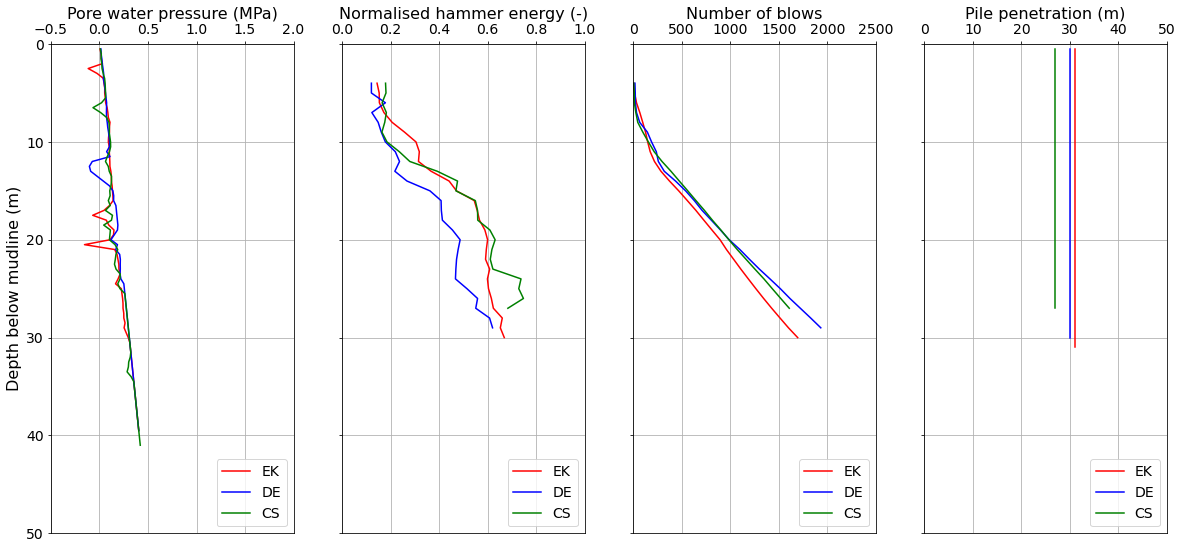

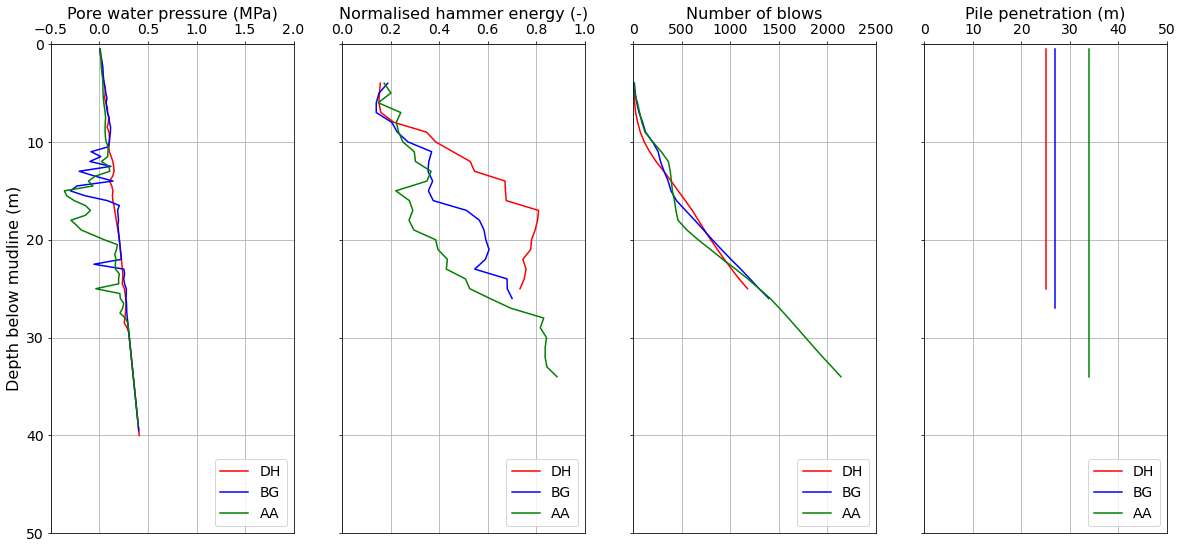

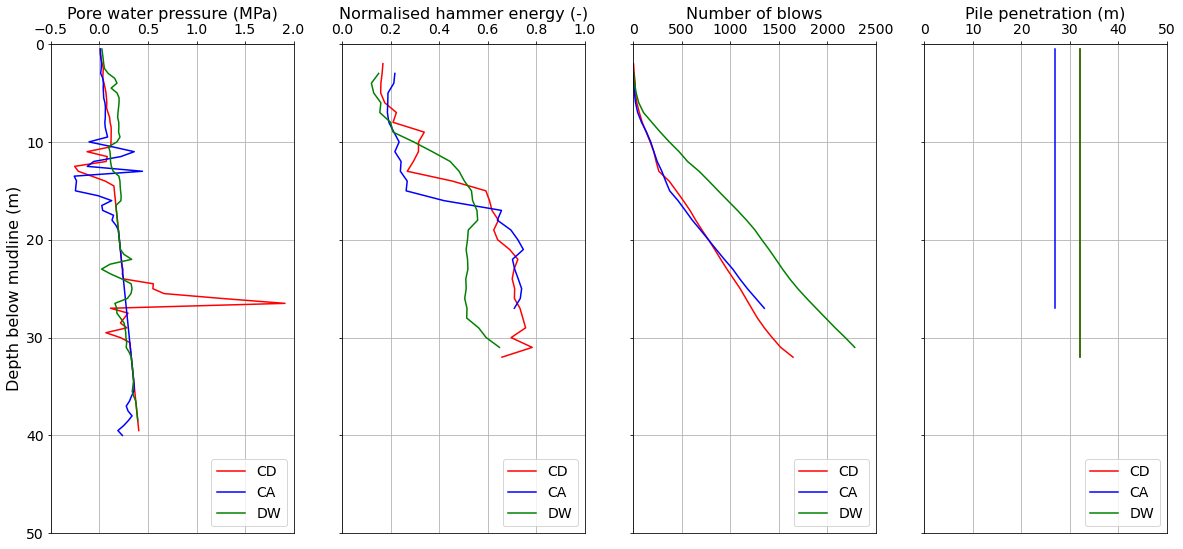

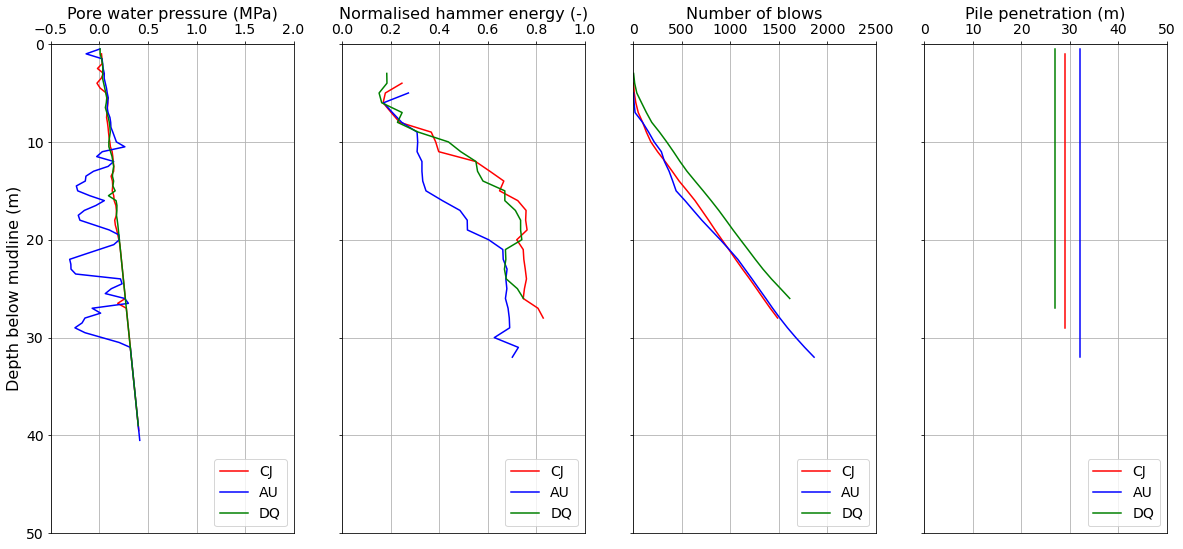

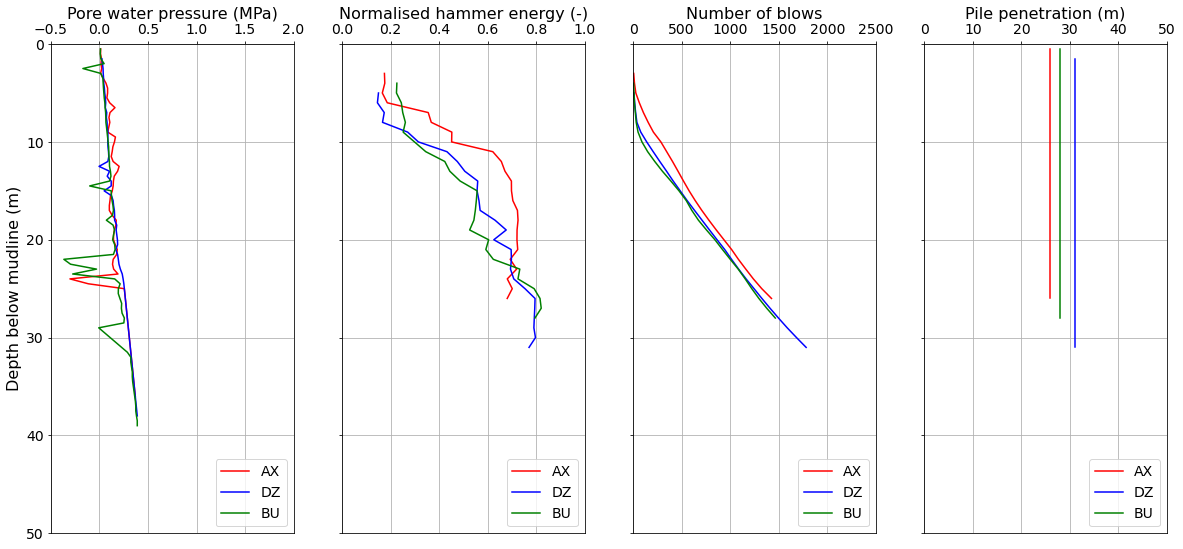

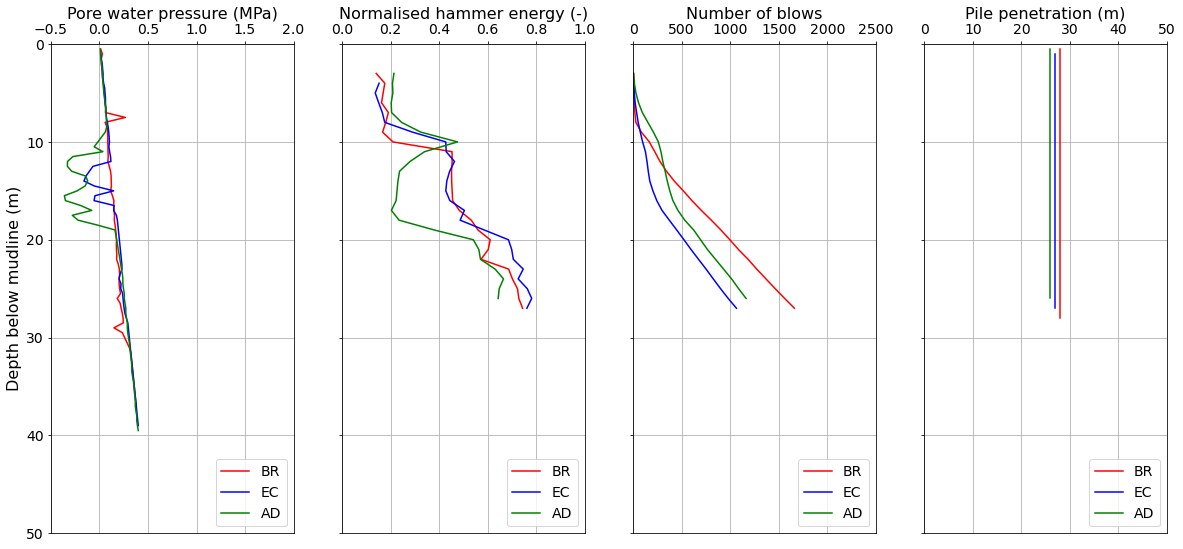

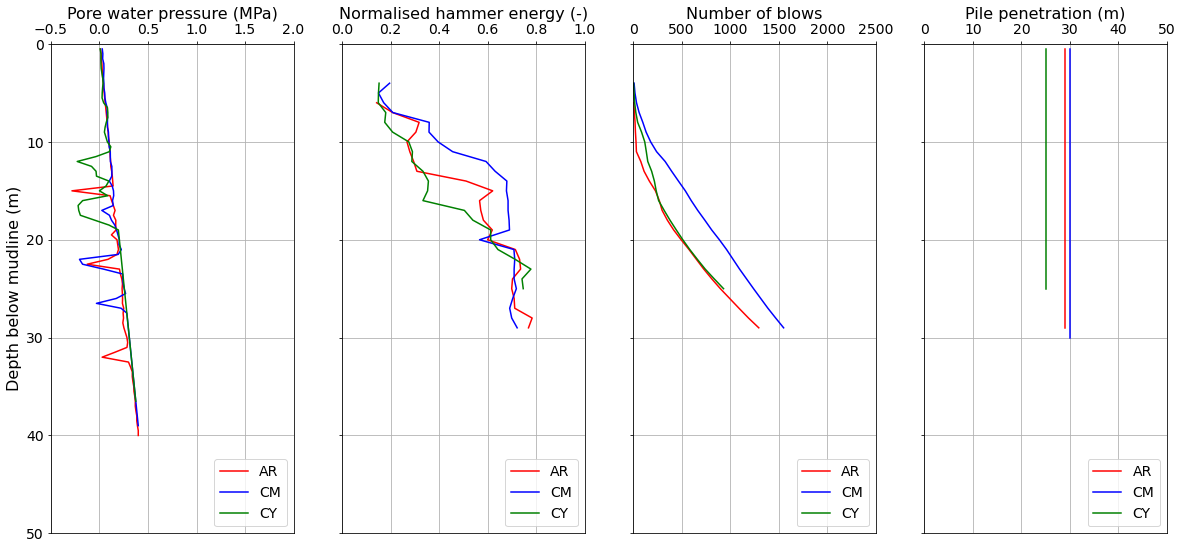

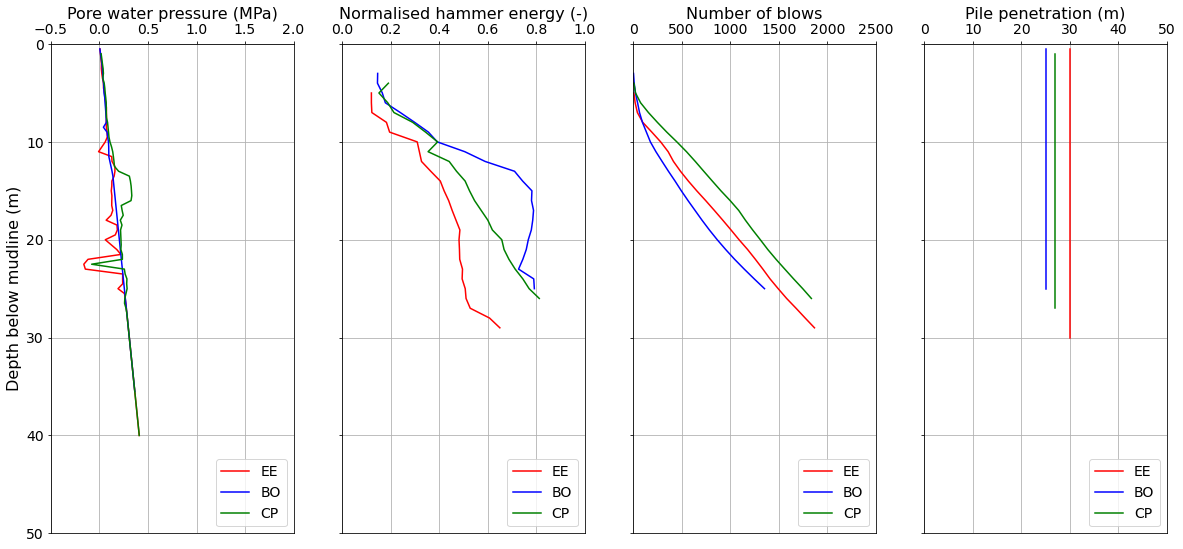

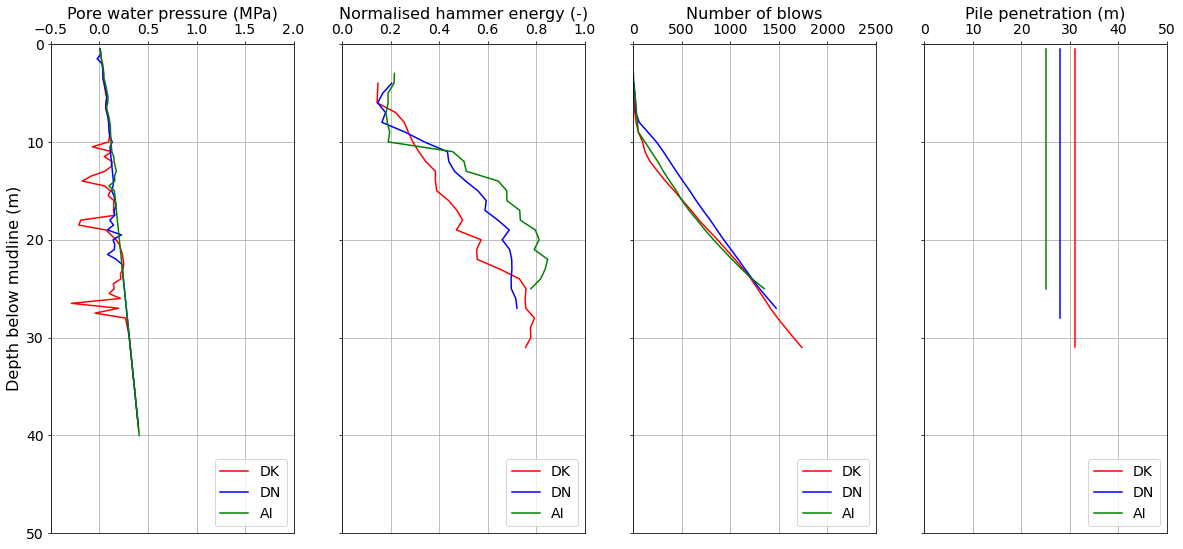

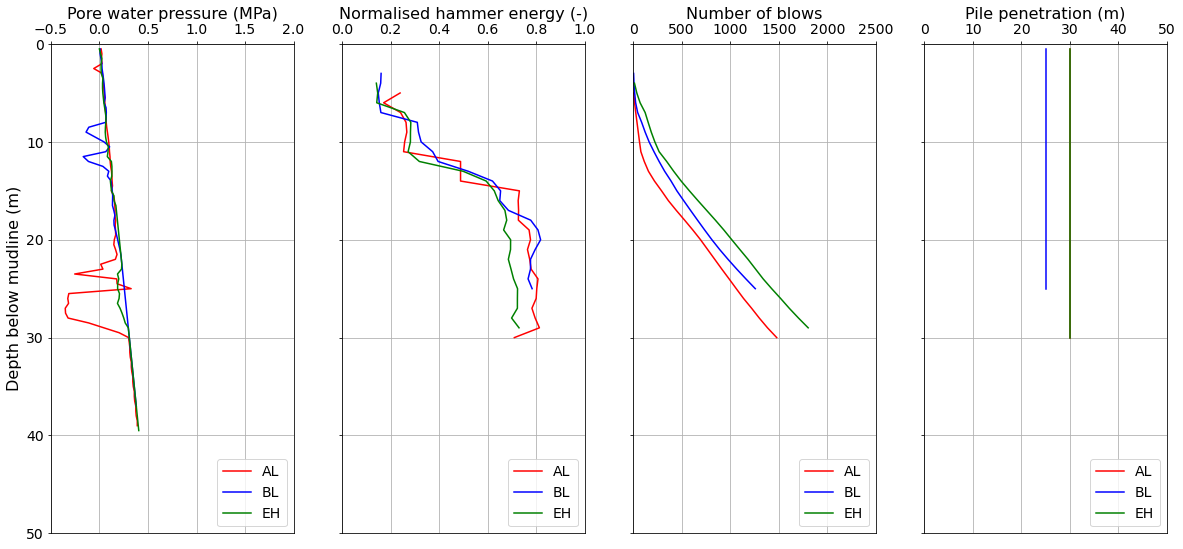

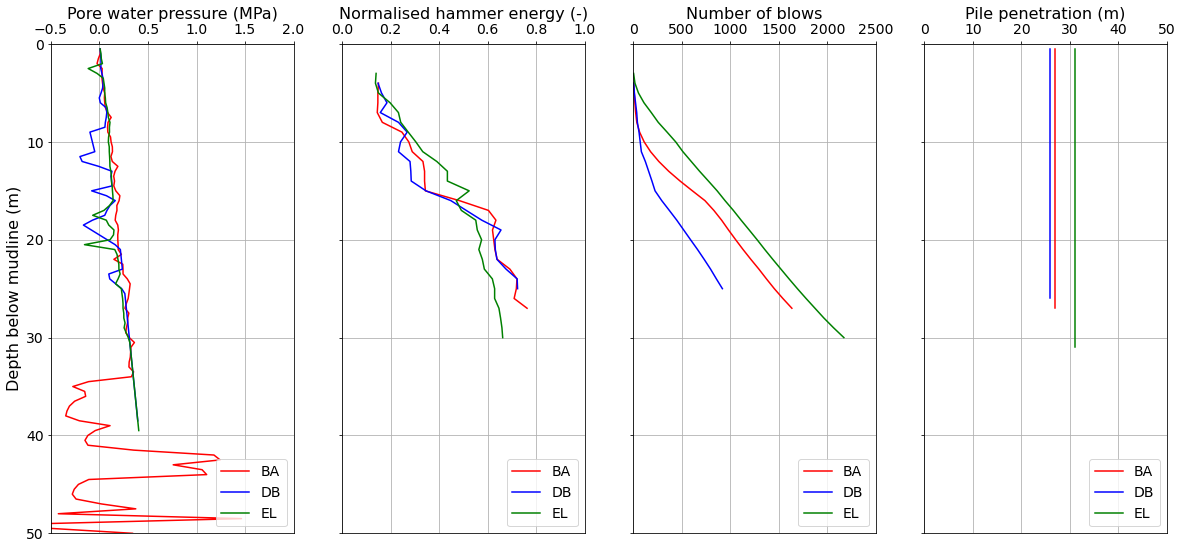

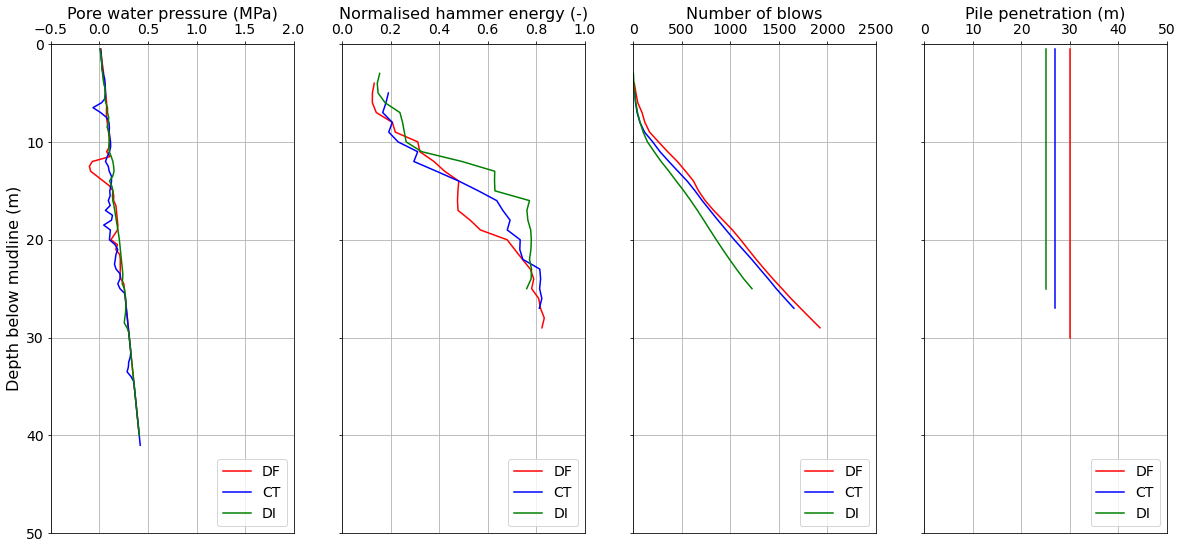

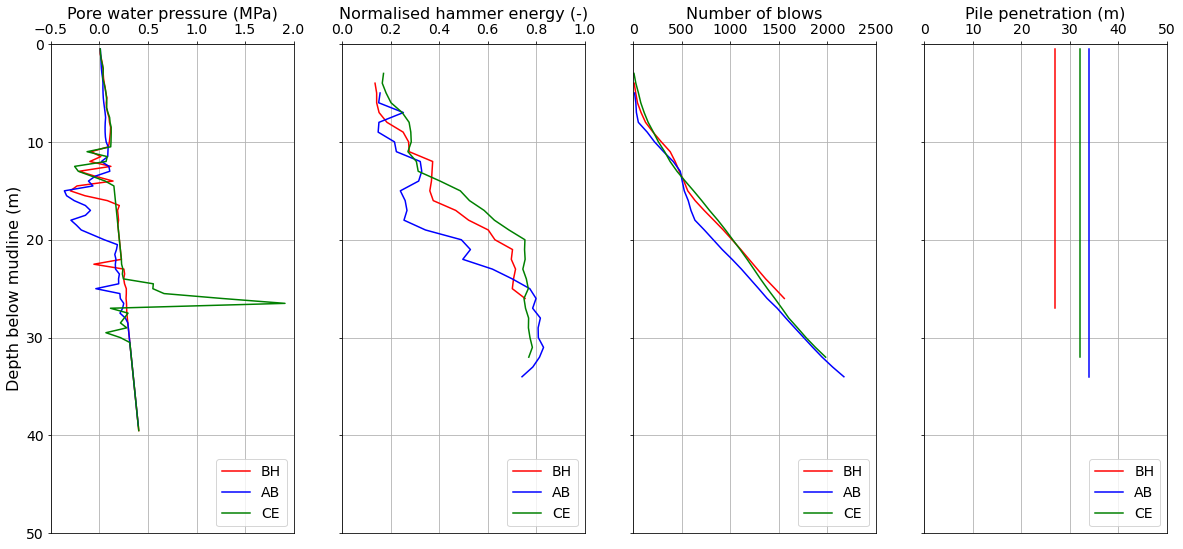

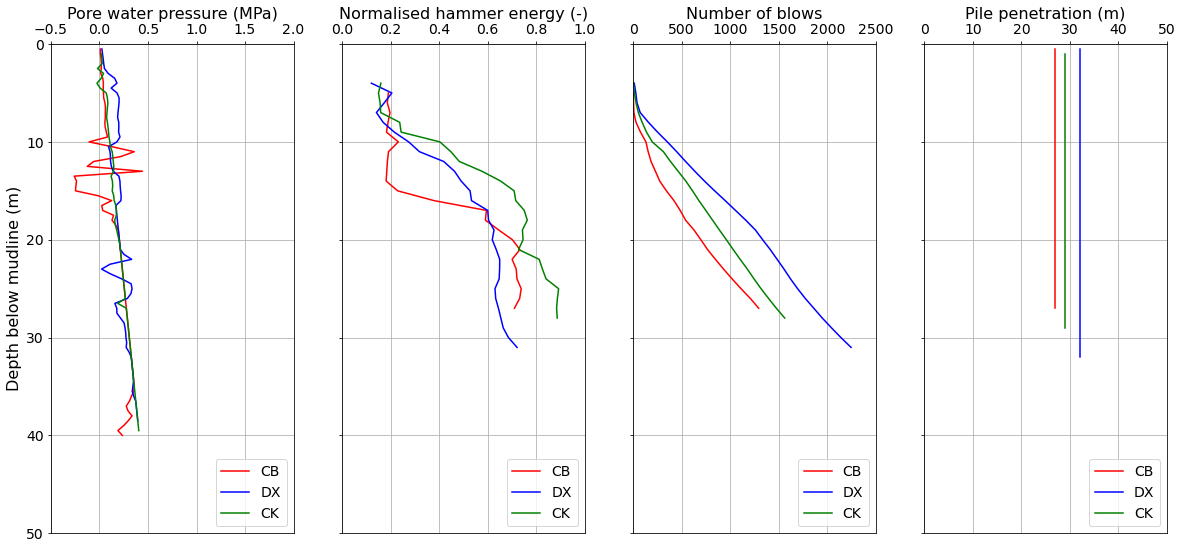

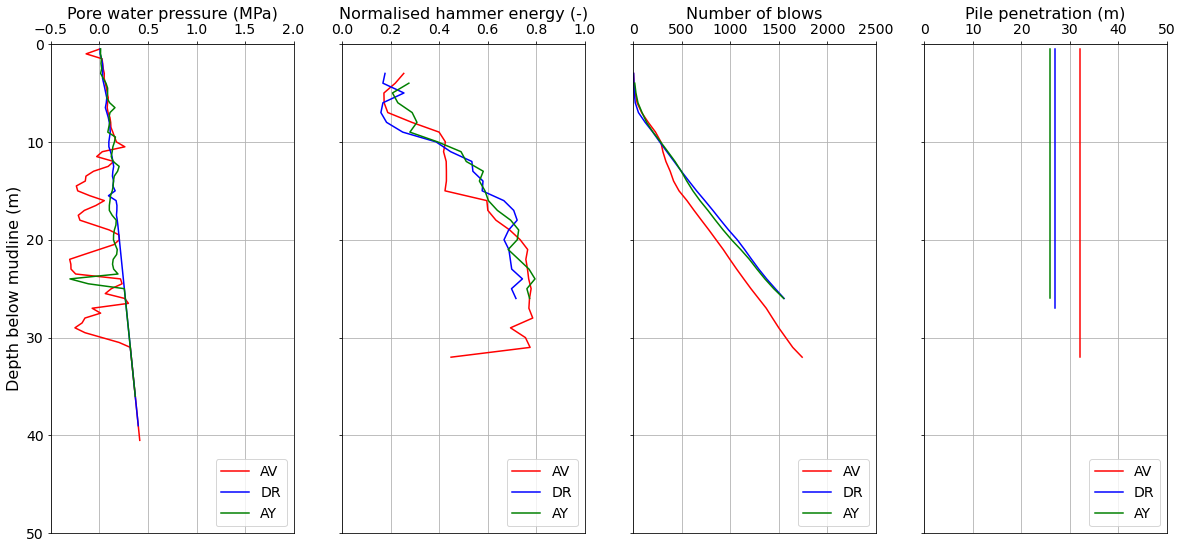

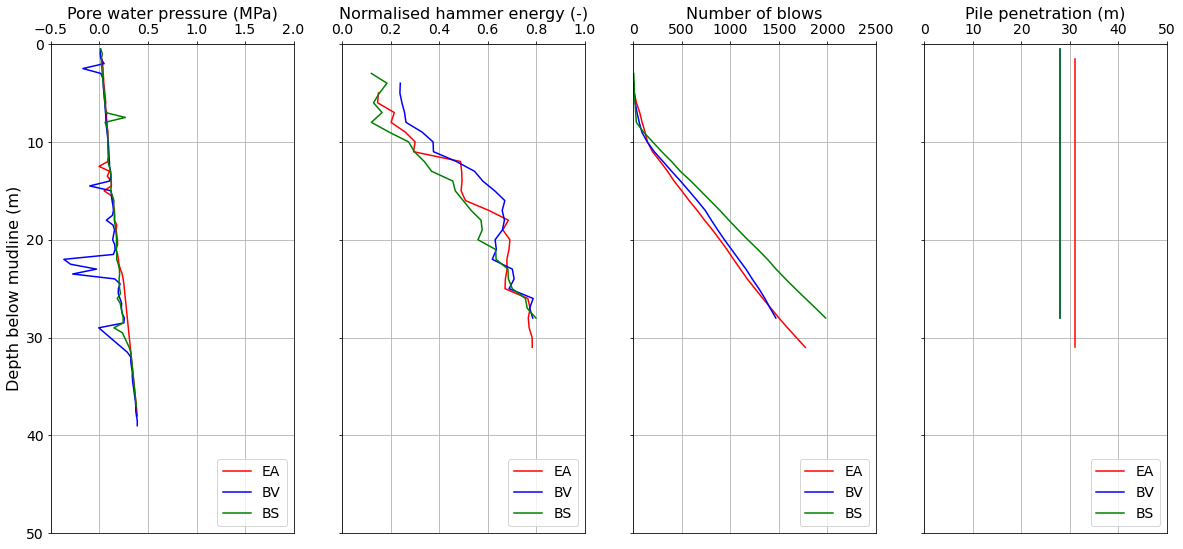

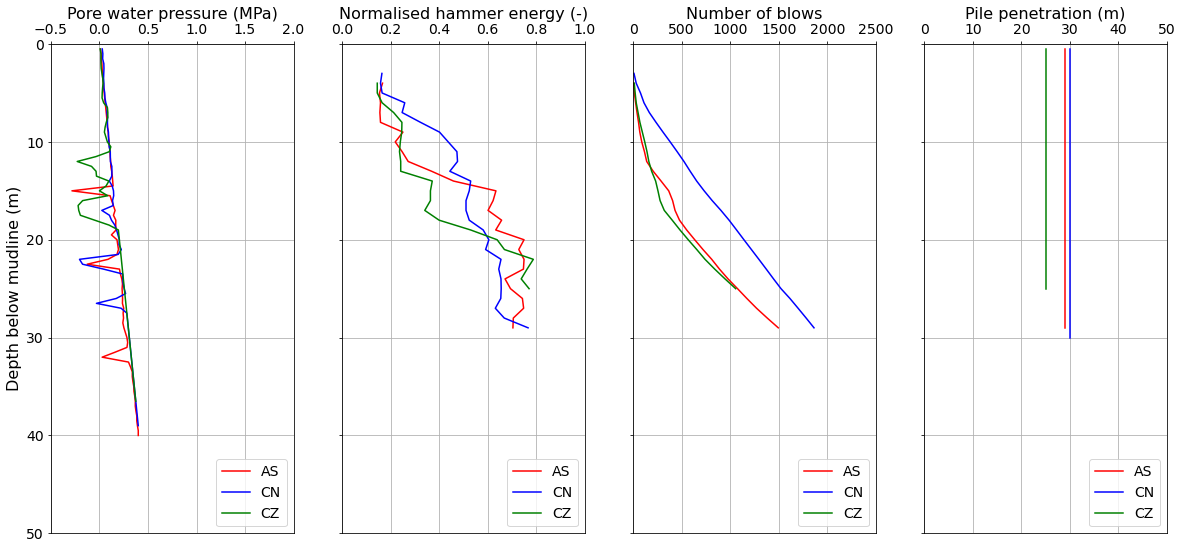

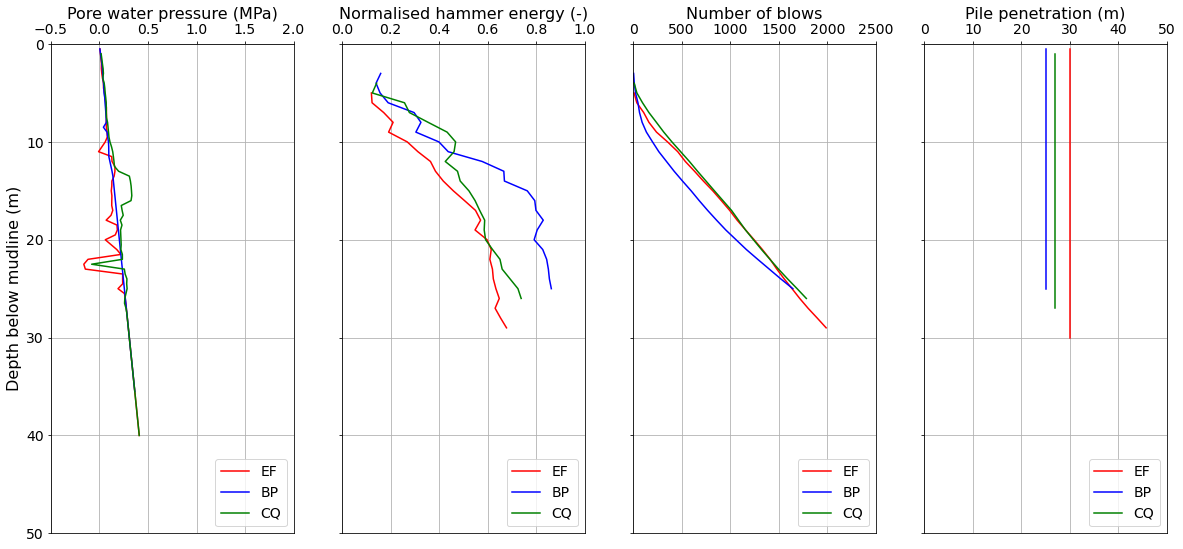

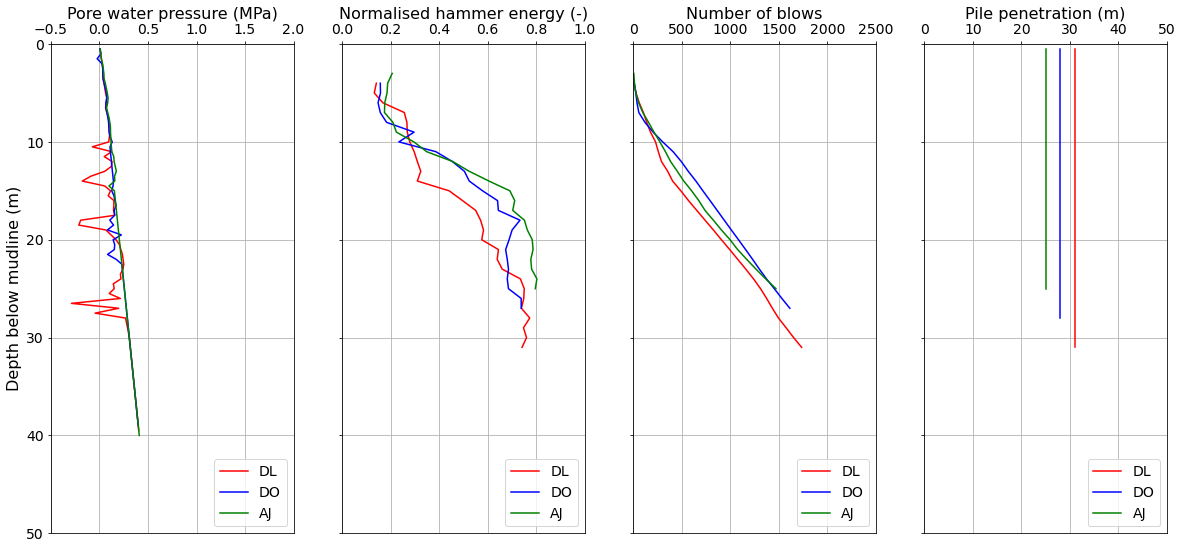

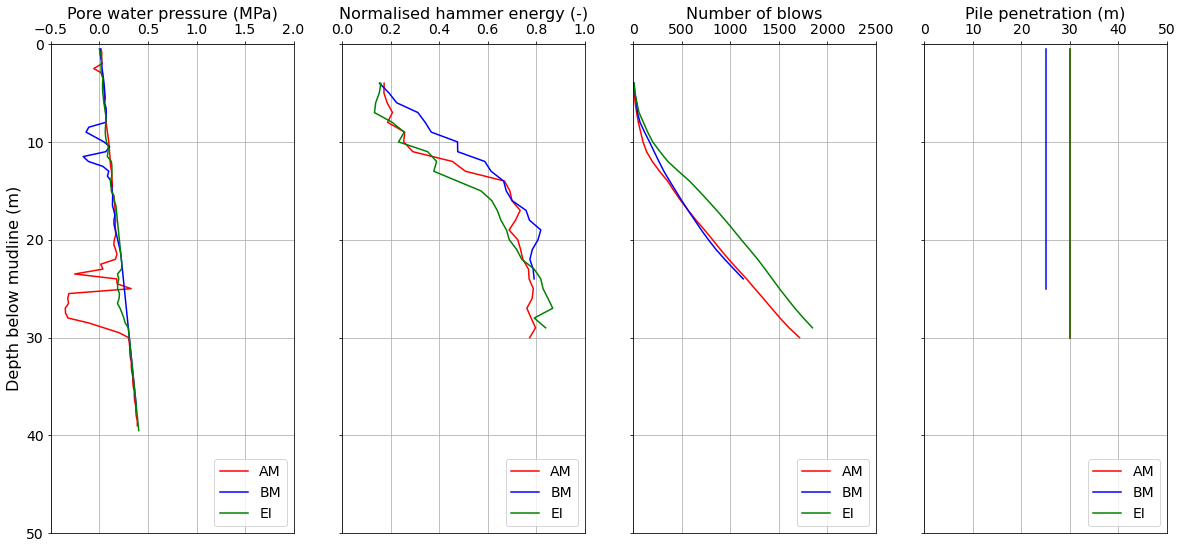

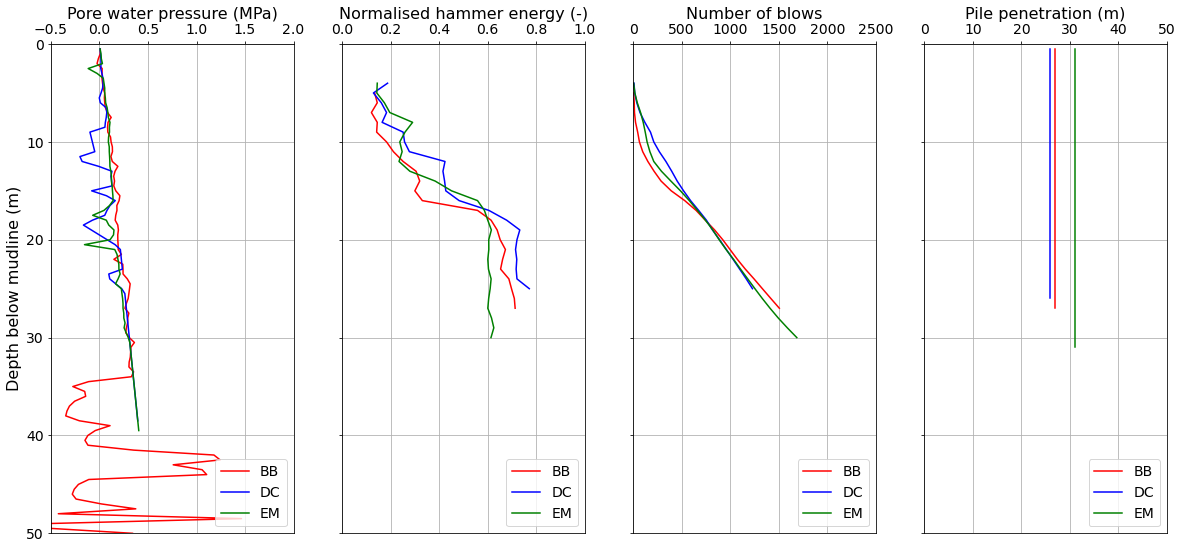

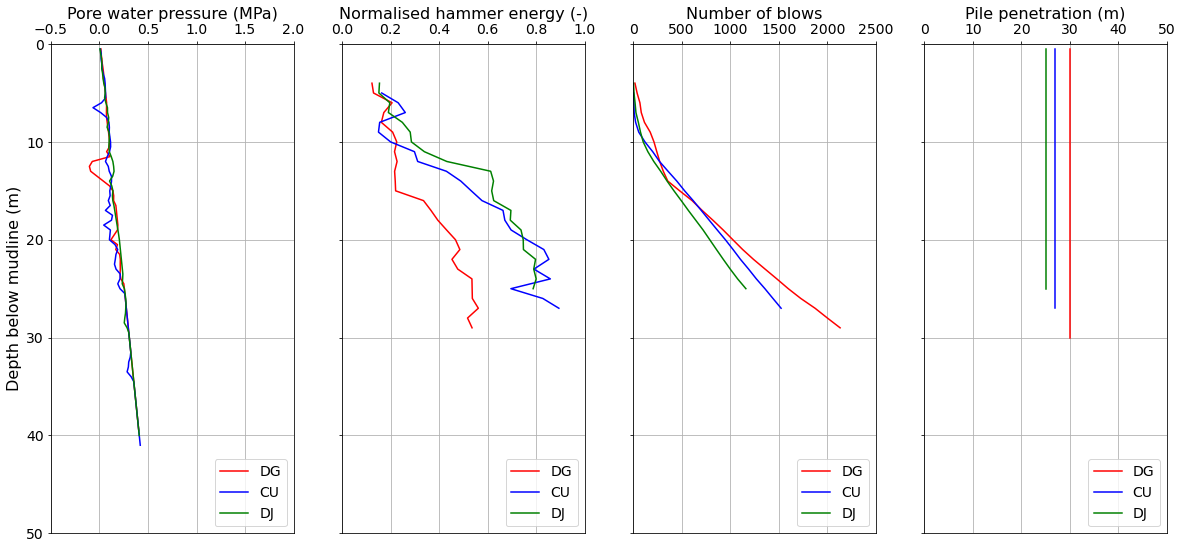

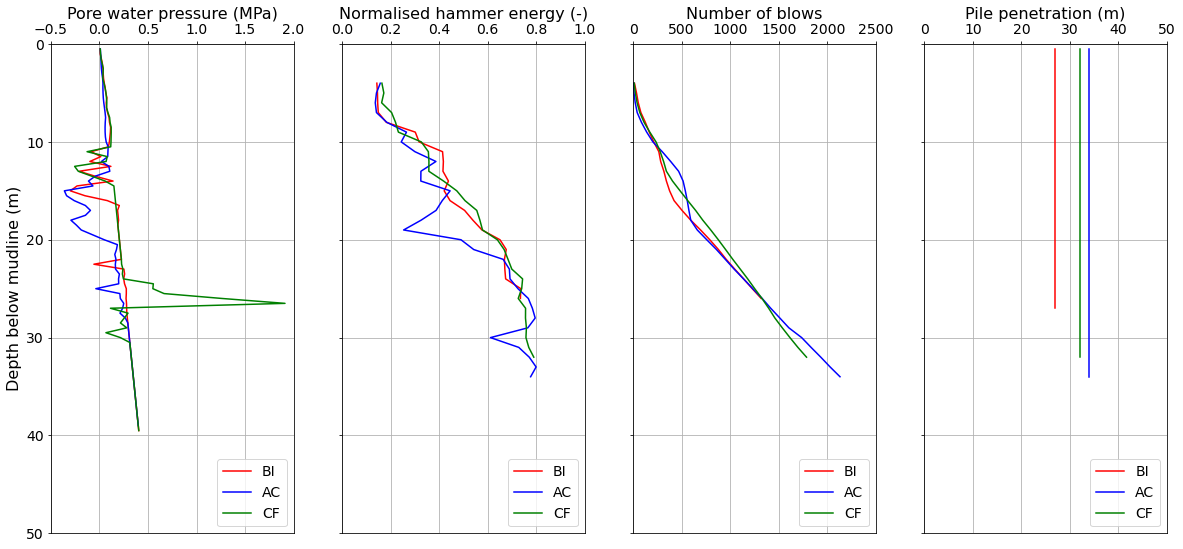

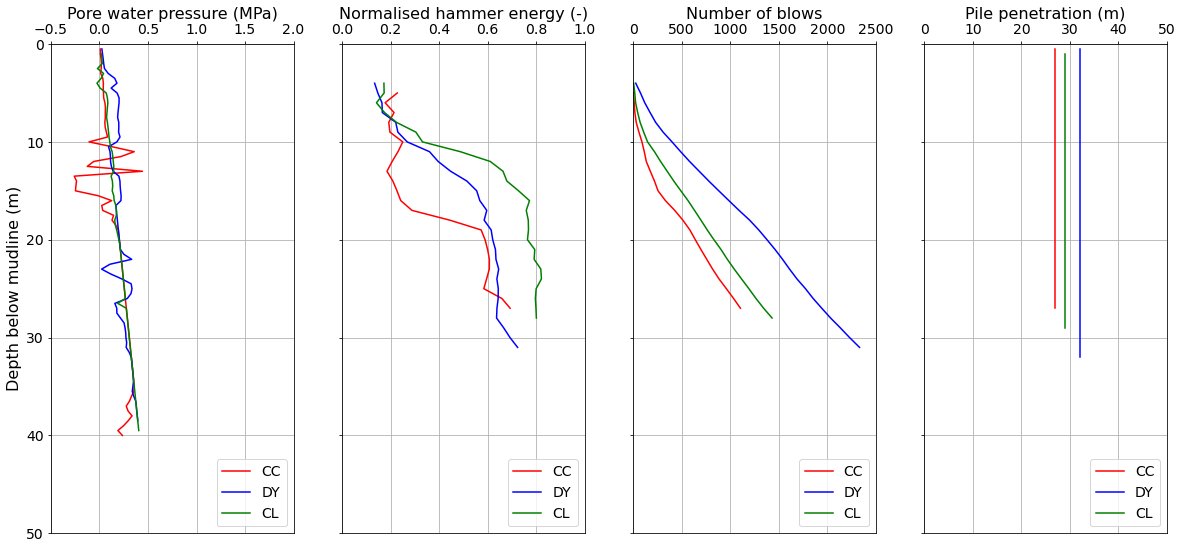

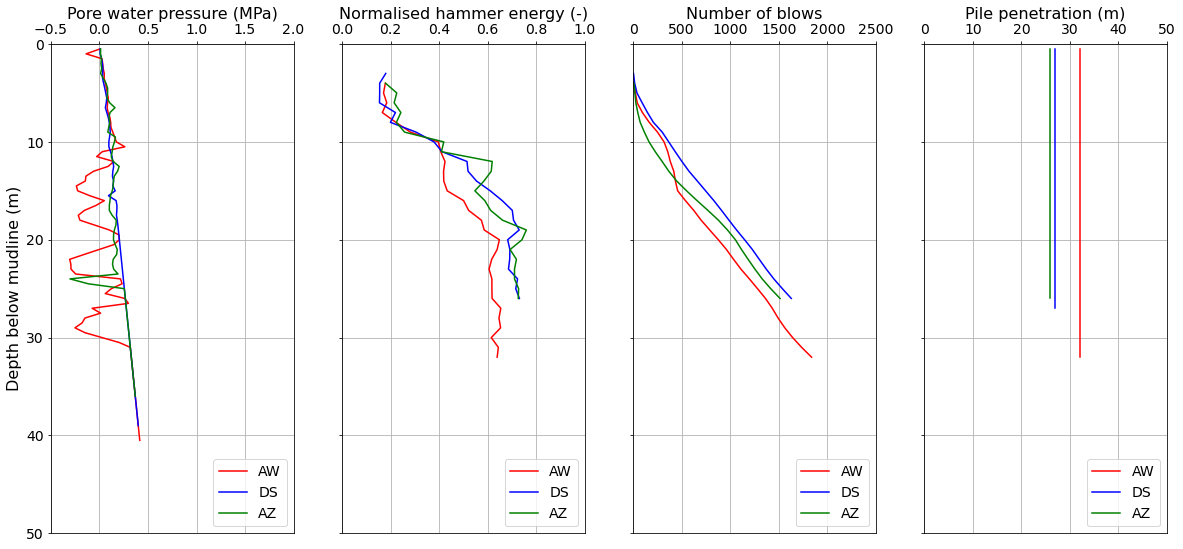

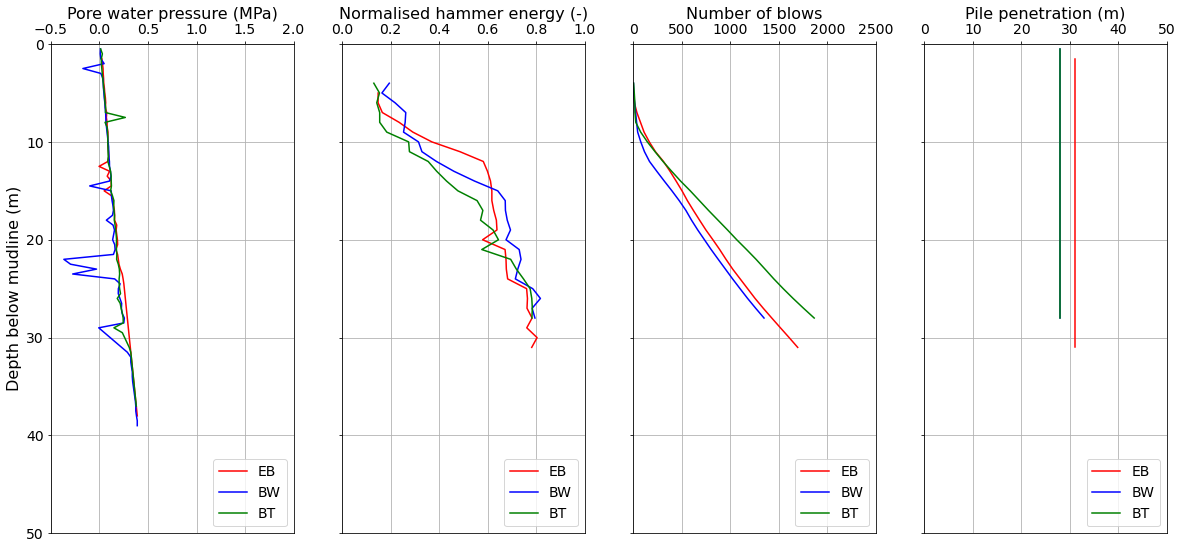

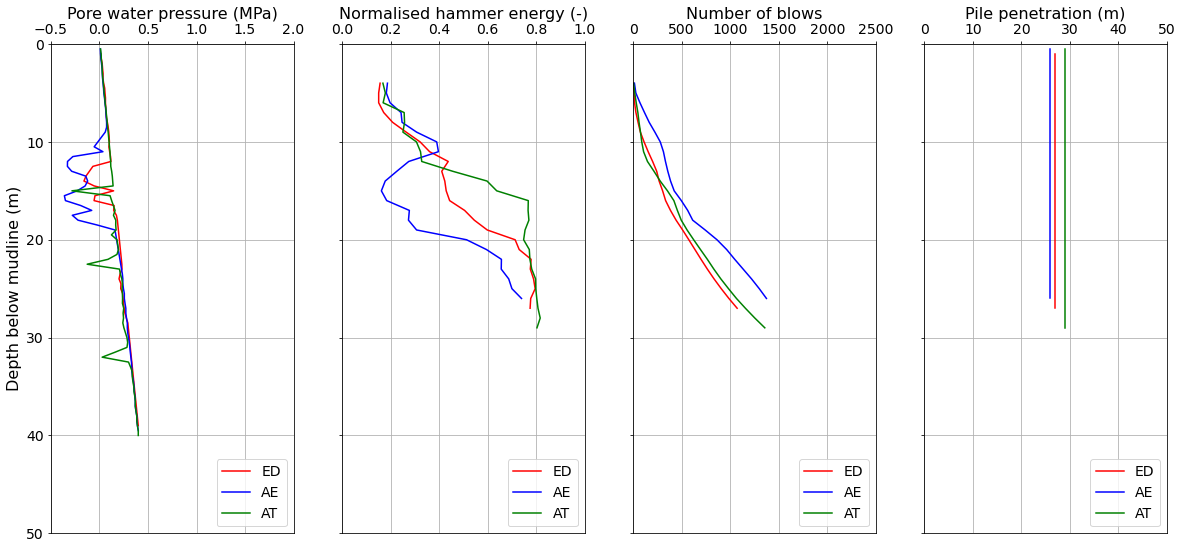

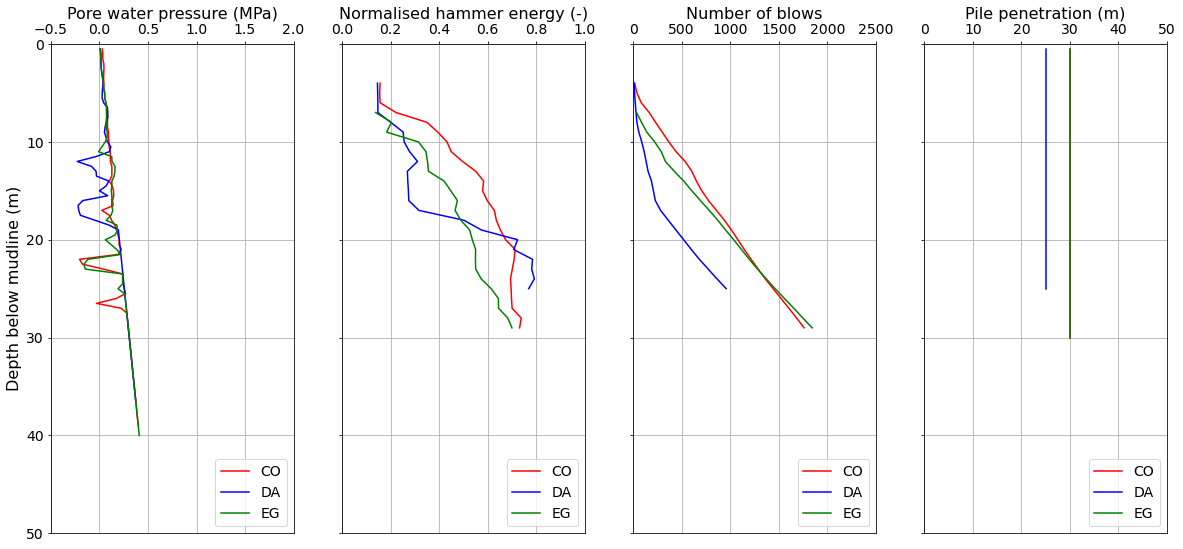

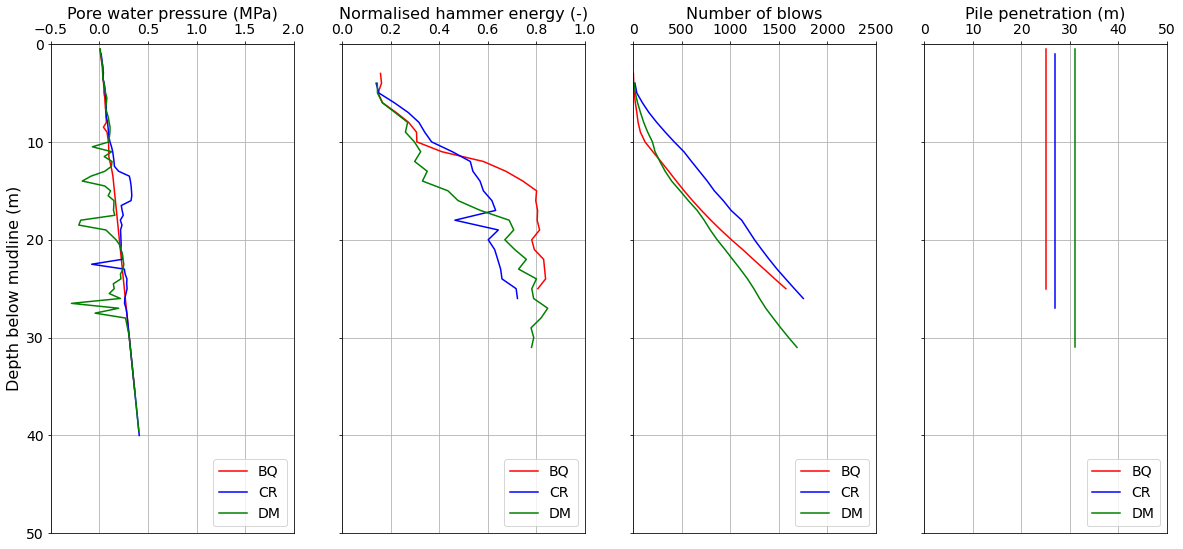

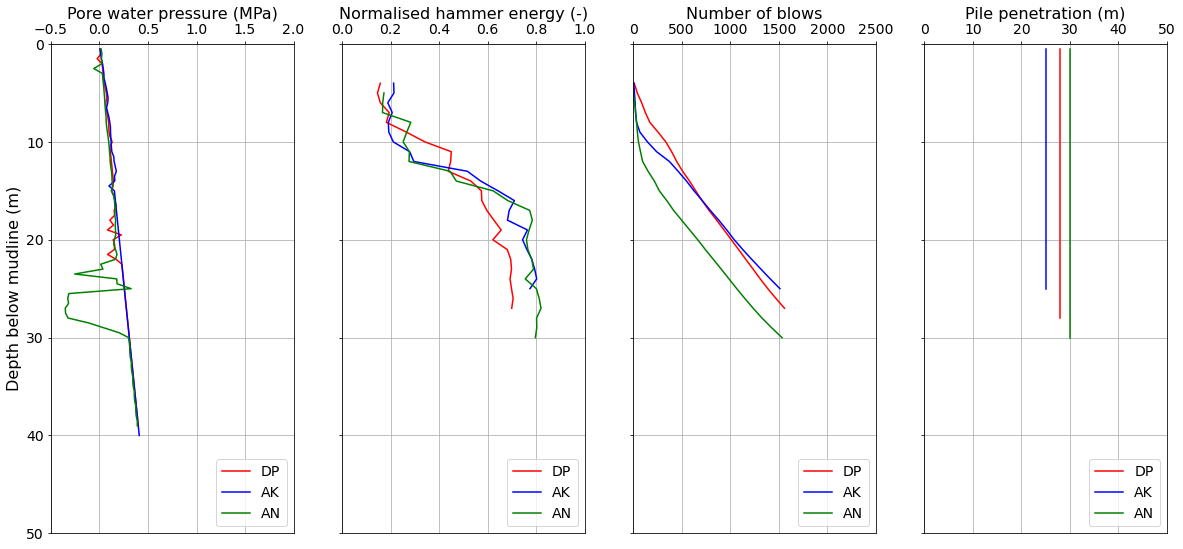

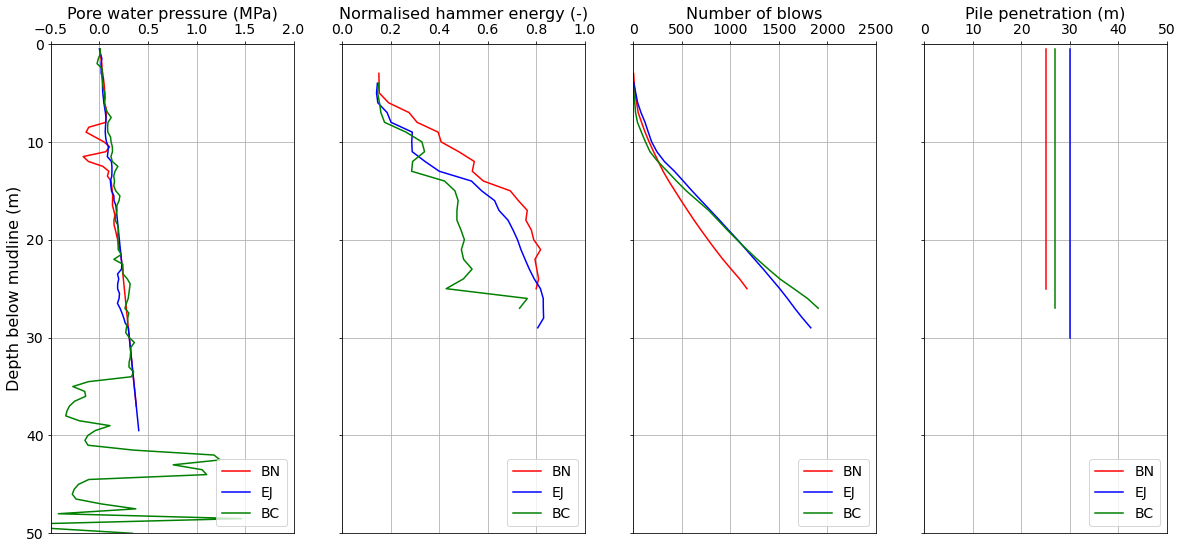

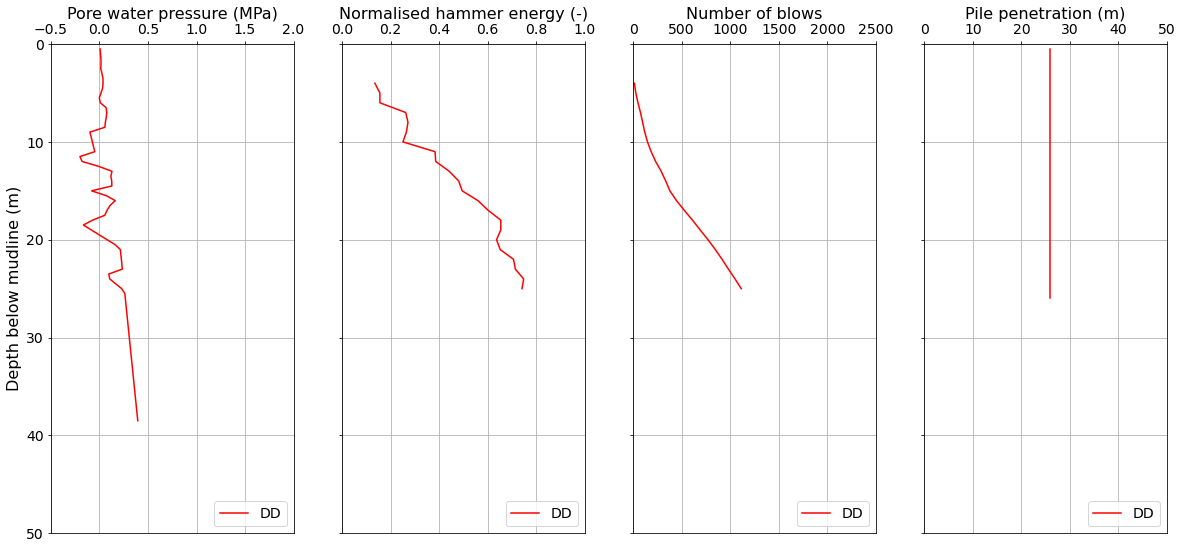

In [25]:
##plot pore water pressure u2, normalized hammer energy, number of blows, and pile penetration
k = 0
while k < train_full['Location ID'].unique().shape[0]:
    site_id = train_full['Location ID'].unique()[k:(k+3)]
    fig,((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,sharey = True,figsize = (20,9))
    i = 0
    for location in site_id:
        locationdata = train_full[train_full['Location ID']==location].copy()
        ax1.plot(locationdata['u2 [MPa]'],locationdata['z [m]'],color = color_list[i],label = location)
        ax2.plot(locationdata['Normalised hammer energy [-]'],locationdata['z [m]'],color = color_list[i],label = location)
        ax3.plot(locationdata['Number of blows'],locationdata['z [m]'],color = color_list[i],label = location)
        ax4.plot(locationdata['Pile penetration [m]'],locationdata['z [m]'],color = color_list[i],label = location)
        i+=1
    for ax in (ax1,ax2,ax3,ax4):
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.grid()
        ax.set_ylim(50,0)
        ax.tick_params(axis = 'x',labelsize = 14)
        ax.legend(loc = 'lower right',prop = {'size':14})
    ax1.set_xlabel(r"Pore water pressure (MPa)",fontsize = 16)
    ax2.set_xlabel(r"Normalised hammer energy (-)",fontsize = 16)
    ax3.set_xlabel(r"Number of blows",fontsize = 16)
    ax4.set_xlabel(r"Pile penetration (m)",fontsize = 16)
    ax1.set_ylabel(r"Depth below mudline (m)",fontsize = 16)
    ax1.tick_params(axis = 'y',labelsize = 14)
    ax1.set_xlim(-0.5,2)
    ax2.set_xlim(0,1)
    ax3.set_xlim(0,2500)
    ax4.set_xlim(0,50)
    plt.show()
    k+=3

# cross validation to determine best alpha-value to optimize the linear coefficients

# create new features
# use IC-05 method (Jardine)

In [140]:
##first define input parameters
##atmospheric pressure (MPa)
P_atm = 0.101325
##define interface friction angle between sand and pile
tan_delta = np.tan(29)
##unit of D_CPT is meter
D_CPT = 0.035814

In [141]:
train_unit = pd.DataFrame()
train_unit = train.copy()
##compute the h-part
train_unit['h [m]'] = train['Pile penetration [m]']-train['z [m]']
##compute the effective area of the pipe pile
train_unit['R_star [m]'] = pow(pow(train["Diameter [m]"],2)/4-
                          pow(train["Diameter [m]"]-2*train["Bottom wall thickness [mm]"]/1000,2)/4,0.5)
##compute max function which involves h-part
train_unit['h_R_max'] =  np.maximum(train_unit["h [m]"]/train_unit["R_star [m]"],np.full(train.shape[0],8))
##compute the unit shaft friction
train_unit['tao [MPa]'] = 0.9*0.029*1.0*train["qc [MPa]"]*pow((10.2*train["z [m]"])/P_atm/1000,0.13)*pow(train_unit["h_R_max"],-0.38)*tan_delta
##compute the unit end bearing
train_unit['qb [MPa]'] = (0.5-0.25*np.log(train["Diameter [m]"]/D_CPT))*train["qc [MPa]"]

# cross validation parameters

In [120]:
CV_fold = np.arange(1,6)
alpha_sen = np.linspace(1e-3,0.5,500)

##store the best MSE, R^2
MSE_train = np.zeros(len(alpha_sen))
R2_train = np.zeros(len(alpha_sen))

linearized_features = ['linearized ENTRHU','linearized Qult','linearized z']

In [137]:
t_begin = timeit.default_timer()
for i,alpha in enumerate(alpha_sen):
    ##random group assignments for cross validation (unbalanced design)
    index_values = np.random.choice(CV_fold,train['Location ID'].unique().shape[0],replace = True)
    MSE_temp = np.zeros(len(CV_fold))
    R2_temp = np.zeros(len(CV_fold))
    for k in np.arange(1,len(CV_fold)+1):
        index_out = train_unit['Location ID'].unique()[np.where(index_values==k)]
        data_out = pd.DataFrame()
        data_in = pd.DataFrame()
        ##data_out to compute loss
        data_out = train_unit[train_unit['Location ID'].isin(index_out)].copy()
        ##data_out to fit teh data
        data_in = train_unit[~train_unit['Location ID'].isin(index_out)].copy()
        
        ##training set (left in)
        data_in['Rs [kN]'] = alpha*(np.pi*data_in["Diameter [m]"]*data_in["z [m]"].diff()*
                                          data_in["tao [MPa]"]).cumsum()
        data_in['Qb [kN]'] = (np.pi/4*pow(data_in["Diameter [m]"],2))*data_in["qb [MPa]"]
        data_in['Qult [kN]'] = data_in["Rs [kN]"]+data_in["Qb [kN]"]
        ##linearized features
        data_in["linearized ENTRHU"] = np.tanh(data_in["Normalised ENTRHU [-]"]*5-0.5)
        data_in["linearized Qult"] = np.tanh(data_in["Qult [kN]"]/1000-1)
        data_in["linearized z"] = np.tanh(data_in["z [m]"]/10-0.5)
    
        ##validation set (left out)
        data_out['Rs [kN]'] = alpha*(np.pi*data_out["Diameter [m]"]*
                                     data_out["z [m]"].diff()*data_out["tao [MPa]"]).cumsum()
        data_out['Qb [kN]'] = (np.pi/4*pow(data_out["Diameter [m]"],2))*data_out["qb [MPa]"]
        data_out['Qult [kN]'] = data_out["Rs [kN]"]+data_out["Qb [kN]"]
        ##linearized features
        data_out["linearized ENTRHU"] = np.tanh(data_out["Normalised ENTRHU [-]"]*5-0.5)
        data_out["linearized Qult"] = np.tanh(data_out["Qult [kN]"]/1000-1)
        data_out["linearized z"] = np.tanh(data_out["z [m]"]/10-0.5)
        
        ##drop na values
        x_out = data_out.dropna()[linearized_features]
        y_out = data_out.dropna()['Blowcount [Blows/m]']
        x_in = data_in.dropna()[linearized_features]
        y_in = data_in.dropna()['Blowcount [Blows/m]']
        
        ##fit a linear model
        lm1 = LinearRegression().fit(x_in,y_in)
        y_pred_lm1 = lm1.predict(x_out)
        
        MSE_temp[k-1] = mean_squared_error(y_out,y_pred_lm1)
        R2_temp[k-1] = r2_score(y_out,y_pred_lm1)
        
    ##calculate teh average MSE and R2
    MSE_train[i] = np.mean(MSE_temp)
    R2_train[i] = np.mean(R2_temp)
t_end = timeit.default_timer()
print("Run time is: ",t_end-t_begin)
print(MSE_train)
print(R2_train)

Run time is:  48.851093500008574
[325.11539994 324.38661942 320.42056238 324.91499237 328.83857205
 340.72627842 324.01646038 323.65793711 324.02321392 329.07498834
 329.37709397 338.82143065 329.70301681 338.32142689 327.0702184
 335.96819727 341.75214188 335.38862629 336.55204221 338.19266723
 330.89595028 348.90750508 347.5652982  339.26668312 343.68120474
 333.4161453  345.68312455 342.77772939 342.10921872 344.40714212
 343.29256055 356.80399421 342.39640073 352.00461558 339.91177794
 348.76540327 347.54173473 351.95821394 351.30283405 359.38499284
 349.62873979 353.06838295 359.95187691 346.1065158  352.48888813
 358.81031004 349.89624477 352.0833562  350.68380505 357.07407672
 356.04888088 355.15024862 349.68946115 351.42236869 353.51212043
 351.08455522 349.95153585 354.31078285 350.12576333 347.89135159
 356.78740041 353.6337963  346.30717565 344.15115539 349.76686255
 354.61325805 353.26137808 357.06178179 354.95099242 358.06260712
 341.1064197  353.73242089 355.94925751 342.

320.42056237554226
0.6366745128083158
0.003
0.008
[2, 7]


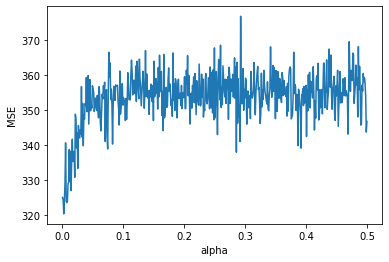

Text(0, 0.5, 'R^2')

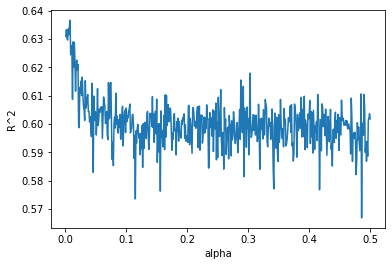

In [139]:
print(min(MSE_train))
print(max(R2_train))

##find alpha values with maximum R2 adn minimum MSE
print(alpha_sen[np.argmin(MSE_train)])
print(alpha_sen[np.argmax(R2_train)])

print([np.argmin(MSE_train),np.argmax(R2_train)])

##plot the sensitivity analysis results
##MSE versus alpha values
plt.plot(alpha_sen,MSE_train)
plt.xlabel(r"alpha")
plt.ylabel(r"MSE")
plt.show()
##R2 versus alpha values
plt.plot(alpha_sen,R2_train)
plt.xlabel(r"alpha")
plt.ylabel(r"R^2")

##note: too much randomness to find the optimal alpha

# sensitivity analysis for alpha

In [154]:
##train test split
##so randomly choose three sites as candidates for validation set
valid_id = ['EL','CB','AV']
train = train_full[~train_full['Location ID'].isin(valid_id)]
valid = train_full[train_full['Location ID'].isin(valid_id)]
print("shape of train: ",train.shape)
print('shape of valid: ',valid.shape)

shape of train:  (7134, 13)
shape of valid:  (240, 13)


In [155]:
##first define input parameters
##atmospheric pressure (MPa)
P_atm = 0.101325
##define interface friction angle between sand and pile
tan_delta = np.tan(29)
##unit of D_CPT is meter
D_CPT = 0.035814

##input data for train set
train_unit = pd.DataFrame()
train_unit = train.copy()
##compute the h-part
train_unit['h [m]'] = train['Pile penetration [m]']-train['z [m]']
##compute the effective area of the pipe pile
train_unit['R_star [m]'] = pow(pow(train["Diameter [m]"],2)/4-
                          pow(train["Diameter [m]"]-2*train["Bottom wall thickness [mm]"]/1000,2)/4,0.5)
##compute max function which involves h-part
train_unit['h_R_max'] =  np.maximum(train_unit["h [m]"]/train_unit["R_star [m]"],np.full(train.shape[0],8))
##compute the unit shaft friction
train_unit['tao [MPa]'] = 0.9*0.029*1.0*train["qc [MPa]"]*pow((10.2*train["z [m]"])
                                                              /P_atm/1000,0.13)*pow(train_unit["h_R_max"],-0.38)*tan_delta
##compute the unit end bearing
train_unit['qb [MPa]'] = (0.5-0.25*np.log(train["Diameter [m]"]/D_CPT))*train["qc [MPa]"]

In [156]:
##input data for validation set
valid_unit = pd.DataFrame()
valid_unit = valid.copy()
##compute the h-part
valid_unit['h [m]'] = valid['Pile penetration [m]']-valid['z [m]']
##compute the effective area of the pipe pile
valid_unit['R_star [m]'] = pow(pow(valid["Diameter [m]"],2)/4-
                          pow(valid["Diameter [m]"]-2*valid["Bottom wall thickness [mm]"]/1000,2)/4,0.5)
##compute max function which involves h-part
valid_unit['h_R_max'] =  np.maximum(valid_unit["h [m]"]/valid_unit["R_star [m]"],np.full(valid.shape[0],8))
##compute the unit shaft friction
valid_unit['tao [MPa]'] = 0.9*0.029*1.0*valid["qc [MPa]"]*pow((10.2*valid["z [m]"])
                                                              /P_atm/1000,0.13)*pow(valid_unit["h_R_max"],-0.38)*tan_delta
##compute the unit end bearing
valid_unit['qb [MPa]'] = (0.5-0.25*np.log(valid["Diameter [m]"]/D_CPT))*valid["qc [MPa]"]

In [162]:
##sensitivity analysis
alpha_sen = np.linspace(1e-3,0.5,500)

MSE_train = np.zeros(len(alpha_sen))
R2_train = np.zeros(len(alpha_sen))
MSE_valid = np.zeros(len(alpha_sen))
R2_valid = np.zeros(len(alpha_sen))

t_begin = timeit.default_timer()
k = 0
for alpha in alpha_sen:
    train_unit['Rs [kN]'] = alpha*(np.pi*train_unit["Diameter [m]"]*train_unit["z [m]"].diff()*
                                   train_unit["tao [MPa]"]).cumsum()
    train_unit["Qb [kN]"] = (np.pi/4*pow(train_unit["Diameter [m]"],2))*train_unit["qb [MPa]"]
    train_unit["Qult [kN]"] = train_unit["Rs [kN]"]+train_unit["Qb [kN]"]
    
    ##linearized features
    train_unit["linearized ENTRHU"] = np.tanh(train_unit["Normalised ENTRHU [-]"]*5-0.5)
    train_unit["linearized Qult"] = np.tanh(train_unit["Qult [kN]"]/1000-1)
    train_unit["linearized z"] = np.tanh(train_unit["z [m]"]/10-0.5)
    
    x_train = train_unit.dropna()[linearized_features]
    y_train = train_unit.dropna()["Blowcount [Blows/m]"]
    
    ##fit teh model
    lm1 = LinearRegression().fit(x_train,y_train)
    y_pred_train_lm1 = lm1.predict(x_train)
    MSE_train[k] = mean_squared_error(y_train,y_pred_train_lm1)
    R2_train[k] = r2_score(y_train,y_pred_train_lm1)
    
    ##valid set
    valid_unit["Rs [kN]"] = 0.7*(np.pi*valid_unit["Diameter [m]"]*valid_unit["z [m]"].diff()*
                valid_unit["tao [MPa]"]).cumsum()
    valid_unit["Qb [kN]"] = (np.pi/4*pow(valid_unit['Diameter [m]'],2))*valid_unit["qb [MPa]"]
    valid_unit["Qult [kN]"] = valid_unit["Rs [kN]"]+valid_unit["Qb [kN]"]
    
    valid_unit["linearized ENTRHU"] = np.tanh(valid_unit["Normalised ENTRHU [-]"]*5-0.5)
    valid_unit["linearized Qult"] = np.tanh(valid_unit["Qult [kN]"]/1000-1)
    valid_unit["linearized z"] = np.tanh(valid_unit["z [m]"]/10-0.5)
    
    x_valid = valid_unit.dropna()[linearized_features]
    y_valid = valid_unit.dropna()["Blowcount [Blows/m]"]
    
    y_pred_valid_lm1 = lm1.predict(x_valid)
    
    MSE_valid[k] = mean_squared_error(y_valid,y_pred_valid_lm1)
    R2_valid[k] = r2_score(y_valid,y_pred_valid_lm1)
    
    k = k+1
t_end = timeit.default_timer()
print("Elapse time = ",t_end-t_begin)

Elapse time =  7.407591800001683


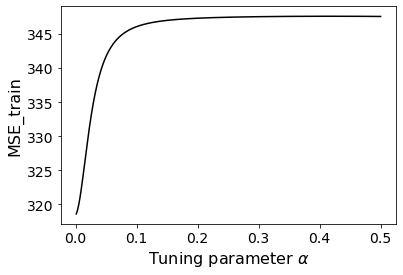

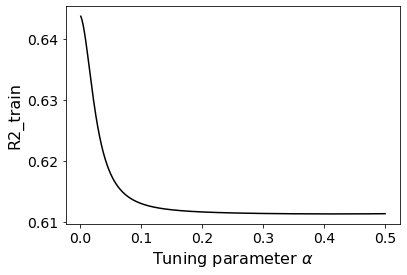

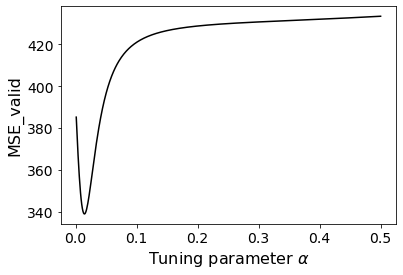

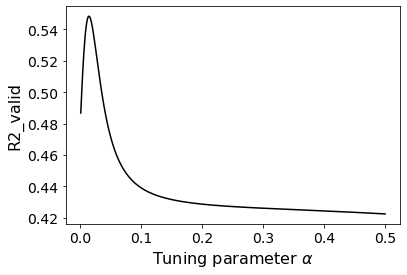

In [163]:
##plot the MSE and r2 score of training dataset and validation dataset
##training dataset
plt.plot(alpha_sen,MSE_train,'k')  
#plt.plot(alpha_aging_sen,MSE_aging_train_2,'b--',label = 'Valid_set2')  
plt.ylabel("MSE_train",fontsize = 16)
plt.xlabel(r"Tuning parameter $\alpha$",fontsize = 16)
plt.tick_params(labelsize = 14)
#plt.legend(loc = 'best',prop = {'size':14})
plt.show()

plt.plot(alpha_sen,R2_train,'k') 
#plt.plot(alpha_aging_sen,r2_aging_train_2,'b--',label = 'Valid_set2')   
plt.ylabel("R2_train",fontsize = 16)
plt.xlabel(r"Tuning parameter $\alpha$",fontsize = 16)
plt.tick_params(labelsize = 14)
#plt.legend(loc = 'best',prop = {'size':14})
plt.show()

##validation dataset
plt.plot(alpha_sen,MSE_valid,'k')
#plt.plot(alpha_aging_sen,MSE_aging_valid_2,'b--',label = 'Valid_set2') 
plt.ylabel("MSE_valid",fontsize = 16)
plt.xlabel(r"Tuning parameter $\alpha$",fontsize = 16)
plt.tick_params(labelsize = 14)
#plt.legend(loc = 'best',prop = {'size':14})
plt.show()
    
plt.plot(alpha_sen,R2_valid,'k')
#plt.plot(alpha_aging_sen,r2_aging_valid_2,'b--',label = 'Valid_set2')
plt.ylabel("R2_valid",fontsize = 16)
plt.xlabel(r"Tuning parameter $\alpha$",fontsize = 16)
plt.tick_params(labelsize = 14)
#plt.legend(loc = 'best',prop = {'size':14})
plt.show()

In [164]:
print("Minimum RMSE = ",min(np.sqrt(MSE_train)))
print("Minimum RMSE = ",min(np.sqrt(MSE_valid)))
print("Maximum R^2 = ",max(R2_valid))
alpha_sen[np.argmin(MSE_valid)]

Minimum RMSE =  17.849508339620957
Minimum RMSE =  18.410747202524114
Maximum R^2 =  0.548367188676215


0.014000000000000002

# results above show that alpha=0.014 is the optimal tuning parameter value

In [182]:
##now set alpha = 0.014 to get the fit function (94 training sites all in)
##first define input parameters
##atmospheric pressure (MPa)
P_atm = 0.101325
##define interface friction angle between sand and pile
tan_delta = np.tan(29)
##unit of D_CPT is meter
D_CPT = 0.035814
alpha = 0.014

##input data for train set
train_unit = pd.DataFrame()
train_unit = train.copy()
##compute the h-part
train_unit['h [m]'] = train['Pile penetration [m]']-train['z [m]']
##compute the effective area of the pipe pile
train_unit['R_star [m]'] = pow(pow(train["Diameter [m]"],2)/4-
                          pow(train["Diameter [m]"]-2*train["Bottom wall thickness [mm]"]/1000,2)/4,0.5)
##compute max function which involves h-part
train_unit['h_R_max'] =  np.maximum(train_unit["h [m]"]/train_unit["R_star [m]"],np.full(train.shape[0],8))
##compute the unit shaft friction
train_unit['tao [MPa]'] = 0.9*0.029*1.0*train["qc [MPa]"]*pow((10.2*train["z [m]"])
                                                              /P_atm/1000,0.13)*pow(train_unit["h_R_max"],-0.38)*tan_delta
##compute the unit end bearing
train_unit['qb [MPa]'] = (0.5-0.25*np.log(train["Diameter [m]"]/D_CPT))*train["qc [MPa]"]

train_unit['Rs [kN]'] = alpha*(np.pi*train_unit["Diameter [m]"]*train_unit["z [m]"].diff()*
                                   train_unit["tao [MPa]"]).cumsum()
train_unit["Qb [kN]"] = (np.pi/4*pow(train_unit["Diameter [m]"],2))*train_unit["qb [MPa]"]
train_unit["Qult [kN]"] = train_unit["Rs [kN]"]+train_unit["Qb [kN]"]
    
##linearized features
train_unit["linearized ENTRHU"] = np.tanh(train_unit["Normalised ENTRHU [-]"]*5-0.5)
train_unit["linearized Qult"] = np.tanh(train_unit["Qult [kN]"]/1000-1)
train_unit["linearized z"] = np.tanh(train_unit["z [m]"]/10-0.5)
    
x_train = train_unit.dropna()[linearized_features]
y_train = train_unit.dropna()["Blowcount [Blows/m]"]
    
##fit teh model
lm1 = LinearRegression().fit(x_train,y_train)
y_pred_train_lm1 = lm1.predict(x_train)
MSE_train = mean_squared_error(y_train,y_pred_train_lm1)
R2_train = r2_score(y_train,y_pred_train_lm1)
print([MSE_train,R2_train])

[327.76649273092323, 0.631523875500704]


In [183]:
##get the submit file
test_unit = test.copy()
##compute the h-part
test_unit['h [m]'] = test['Pile penetration [m]']-test['z [m]']
##compute the effective area of the pipe pile
test_unit['R_star [m]'] = pow(pow(test["Diameter [m]"],2)/4-
                          pow(test["Diameter [m]"]-2*test["Bottom wall thickness [mm]"]/1000,2)/4,0.5)
##compute max function which involves h-part
test_unit['h_R_max'] =  np.maximum(test_unit["h [m]"]/test_unit["R_star [m]"],np.full(test.shape[0],8))
##compute the unit shaft friction
test_unit['tao [MPa]'] = 0.9*0.029*1.0*test["qc [MPa]"]*pow((10.2*test["z [m]"])
                                                              /P_atm/1000,0.13)*pow(test_unit["h_R_max"],-0.38)*tan_delta
##compute the unit end bearing
test_unit['qb [MPa]'] = (0.5-0.25*np.log(test["Diameter [m]"]/D_CPT))*test["qc [MPa]"]

test_unit['Rs [kN]'] = alpha*(np.pi*test_unit["Diameter [m]"]*test_unit["z [m]"].diff()*
                                   test_unit["tao [MPa]"]).cumsum()
test_unit["Qb [kN]"] = (np.pi/4*pow(test_unit["Diameter [m]"],2))*test_unit["qb [MPa]"]
test_unit["Qult [kN]"] = test_unit["Rs [kN]"]+test_unit["Qb [kN]"]
    
##linearized features
test_unit["linearized ENTRHU"] = np.tanh(test_unit["Normalised ENTRHU [-]"]*5-0.5)
test_unit["linearized Qult"] = np.tanh(test_unit["Qult [kN]"]/1000-1)
test_unit["linearized z"] = np.tanh(test_unit["z [m]"]/10-0.5)

test_unit.dropna(inplace = True)
test_unit["linearized ENTRHU"] = np.tanh(test_unit["Normalised ENTRHU [-]"]*5-0.5)
test_unit["linearized Qult"] = np.tanh(test_unit["Qult [kN]"]/1000-1)
test_unit["linearized z"] = np.tanh(test_unit["z [m]"]/10-0.5)

x_test = test_unit[linearized_features]

y_pred_lm1= lm1.predict(x_test)

test_unit['Blowcount [Blows/m]'] = y_pred_lm1

test_unit[['ID','Blowcount [Blows/m]']].to_csv("lm1_IC05_submit_0014Rs_new.csv",index = False)